In [1]:
import numpy as np
import torch
from matplotlib import pyplot as plt
from torch.utils.data import Sampler, BatchSampler, Dataset, DataLoader, SubsetRandomSampler, random_split
from plot import plotAll
from load import prepParetoDataset,prepPartDataset,codec_model,simple_model
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve

/storage/local/data1/home/pharris/mambaforge/envs/torchsort/lib/python3.10/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


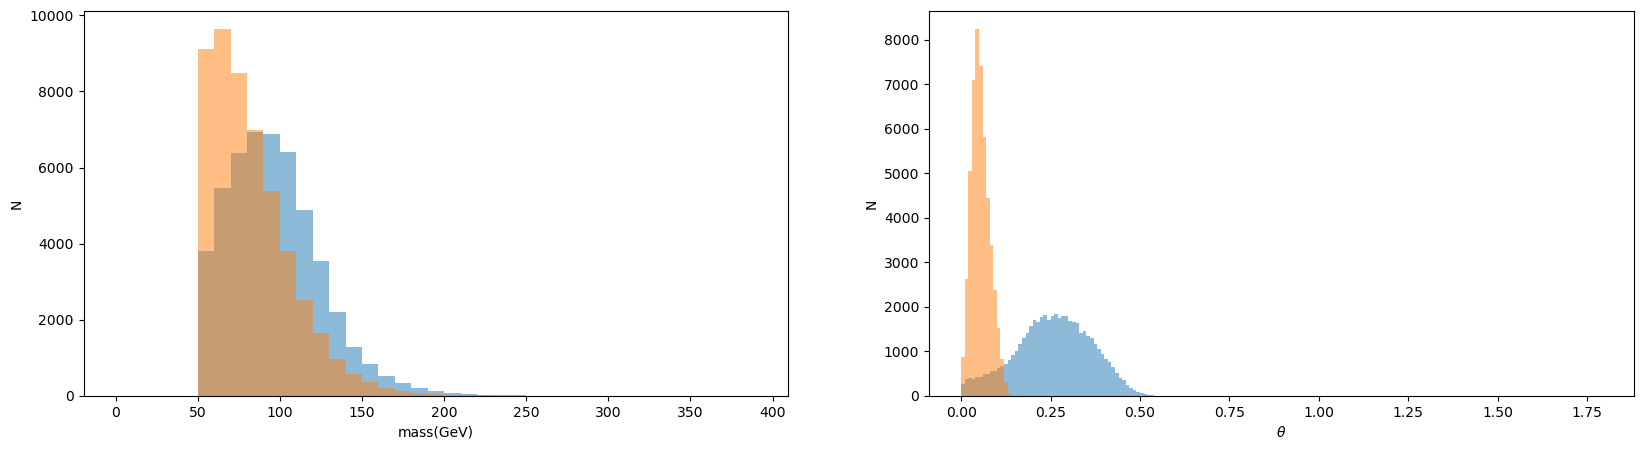

After: [ 7.28912582e+01 -5.12807705e-02  1.12519719e-01  3.64309196e+01
  1.27309203e-01  1.78722948e-01  4.27519569e+01  1.04840495e-01
 -6.26083687e-02  1.08537804e+02 -8.63807425e-02 -5.21767996e-02
  3.64045677e+01  3.62881809e-03 -8.11956357e-04  4.93058090e+01
  8.60979483e-02 -2.22701915e-02  6.82746172e+00  4.92921352e-01
 -4.43265997e-02  1.81653423e+01  2.43103459e-01  1.45820696e-02
  1.00098639e+01 -1.34395495e-01  1.84280768e-01  1.87763443e+01
  9.18339714e-02 -5.51618040e-02  2.62245693e+01 -9.72672626e-02
  3.30369547e-02  7.17286205e+00  7.64388591e-02  9.85520519e-03
  7.26125002e+00 -3.02453674e-02  1.73002690e-01  2.30460548e+01
 -1.26337633e-01  9.81770270e-03  1.21424837e+01 -1.68265492e-01
 -8.18109453e-01  1.45856047e+01 -1.59861892e-01 -1.17281787e-02
  1.58809366e+01  5.81037365e-02  6.55674338e-02  6.88653898e+00
 -4.31234948e-02  5.23680006e-04  3.45274353e+01 -6.52442724e-02
 -3.25277708e-02  5.56538153e+00  5.99278100e-02 -1.47425253e-02
  4.27129898e+01  

In [2]:
mass=50
dataset,size  = prepParetoDataset(mass)
train_indices = torch.arange(0, len(dataset)).numpy()
theta, label,mass = dataset[train_indices]

figure, axis = plt.subplots(1, 2,figsize=(20,5))
bins=np.arange(0,400,10)
axis[0].hist(mass[label==0],alpha=0.5,bins=bins)
axis[0].hist(mass[label==1],alpha=0.5,bins=bins)
axis[0].set_xlabel('mass(GeV)'); axis[0].set_ylabel('N')
bins=np.arange(0,1.8,0.01)
axis[1].hist(theta[label==0],alpha=0.5,bins=bins)
axis[1].hist(theta[label==1],alpha=0.5,bins=bins)
axis[1].set_xlabel(r"$\theta$"); axis[1].set_ylabel('N')
plt.show()
dataset1,dataset2,size         = prepPartDataset(mass) 

Epoch: 0 LOSS train: 1.0103 valid: 0.9921 clr: 0.0000 var: 0.9896 cor: 0.0184 corr1: 0.0023 corr2: 0.0000
Epoch: 1 LOSS train: 0.9903 valid: 0.9897 clr: 0.0000 var: 0.9890 cor: 0.0007 corr1: 0.0005 corr2: 0.0000
Epoch: 2 LOSS train: 0.9893 valid: 0.9890 clr: 0.0000 var: 0.9886 cor: 0.0002 corr1: 0.0004 corr2: 0.0000
Epoch: 3 LOSS train: 0.9886 valid: 0.9884 clr: 0.0001 var: 0.9881 cor: 0.0001 corr1: 0.0003 corr2: 0.0000
Epoch: 4 LOSS train: 0.9878 valid: 0.9872 clr: 0.0001 var: 0.9872 cor: 0.0001 corr1: 0.0003 corr2: 0.0000
Epoch: 5 LOSS train: 0.9858 valid: 0.9842 clr: 0.0002 var: 0.9852 cor: 0.0001 corr1: 0.0003 corr2: 0.0000
Epoch: 6 LOSS train: 0.9806 valid: 0.9752 clr: 0.0005 var: 0.9797 cor: 0.0001 corr1: 0.0003 corr2: 0.0000
Epoch: 7 LOSS train: 0.9625 valid: 0.9416 clr: 0.0031 var: 0.9589 cor: 0.0001 corr1: 0.0003 corr2: 0.0000
Epoch: 8 LOSS train: 0.9119 valid: 0.8831 clr: 0.0272 var: 0.8840 cor: 0.0002 corr1: 0.0004 corr2: 0.0000
Epoch: 9 LOSS train: 0.8635 valid: 0.8434 clr:

Epoch: 3 LOSS train: 0.06314555555582047 valid: 0.06288474798202515
Epoch: 4 LOSS train: 0.06302890926599503 valid: 0.06272268295288086
Epoch: 5 LOSS train: 0.06289634108543396 valid: 0.06257499754428864
Epoch: 6 LOSS train: 0.06275974959135056 valid: 0.06243889033794403
Epoch: 7 LOSS train: 0.06263324618339539 valid: 0.06233014911413193
Epoch: 8 LOSS train: 0.06252086162567139 valid: 0.062207989394664764
Epoch: 9 LOSS train: 0.062426820397377014 valid: 0.06212584301829338
Epoch: 10 LOSS train: 0.06234031170606613 valid: 0.062039513140916824
Epoch: 11 LOSS train: 0.06225542724132538 valid: 0.06195849925279617
Epoch: 12 LOSS train: 0.06216970086097717 valid: 0.06187102198600769
Epoch: 13 LOSS train: 0.062085095793008804 valid: 0.061796851456165314
Epoch: 14 LOSS train: 0.06200059503316879 valid: 0.06171112507581711
AUC 0.9583835526569967
test -0.03061822883044299 0.15949421889156976
test 0.07747047432193653 -0.05992396507913993
test -0.7288486341018993 -0.6126661815859386


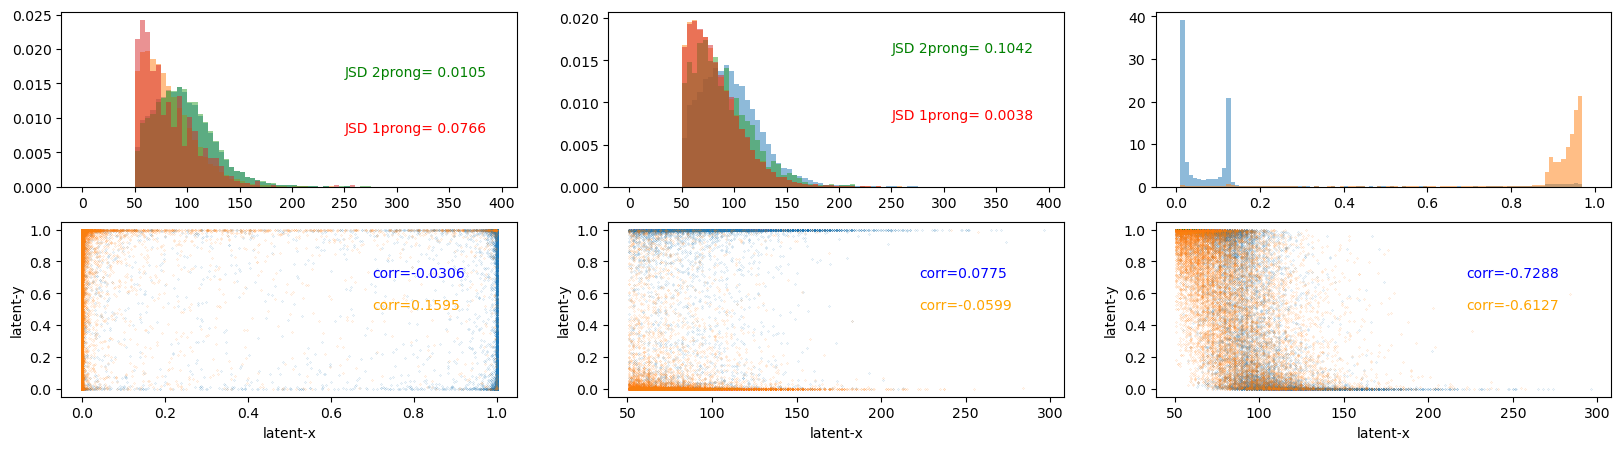

/storage/local/data1/home/pharris/mambaforge/envs/torchsort/lib/python3.10/site-packages/numpy/lib/histograms.py:906: RuntimeWarning: invalid value encountered in divide
  return n/db/n.sum(), bin_edges


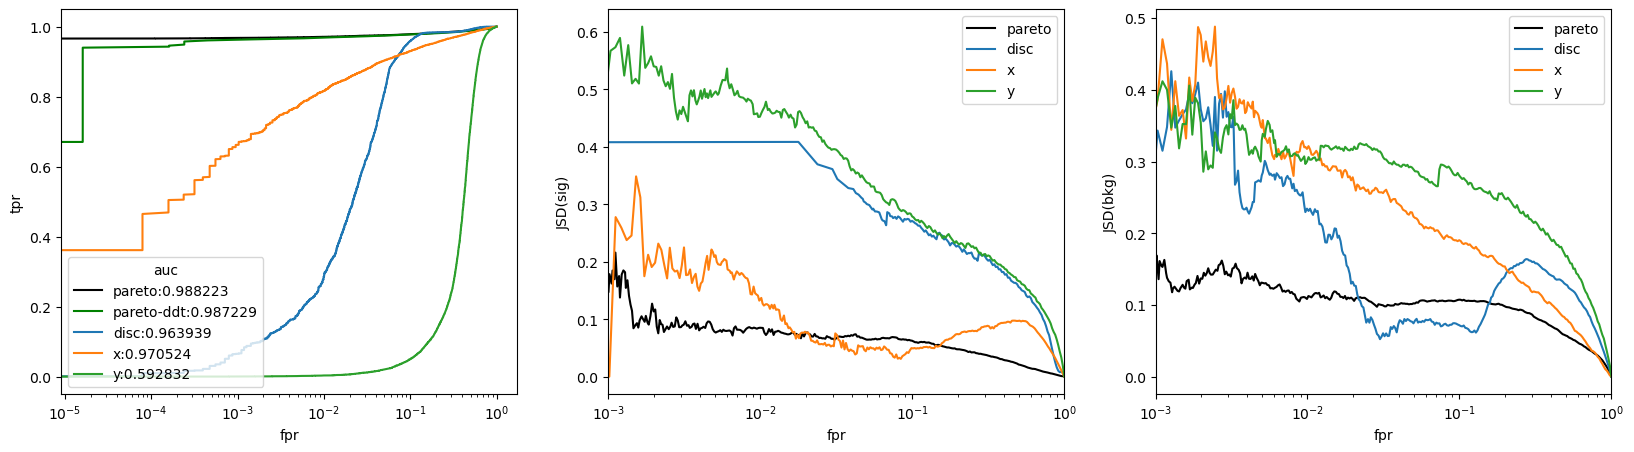

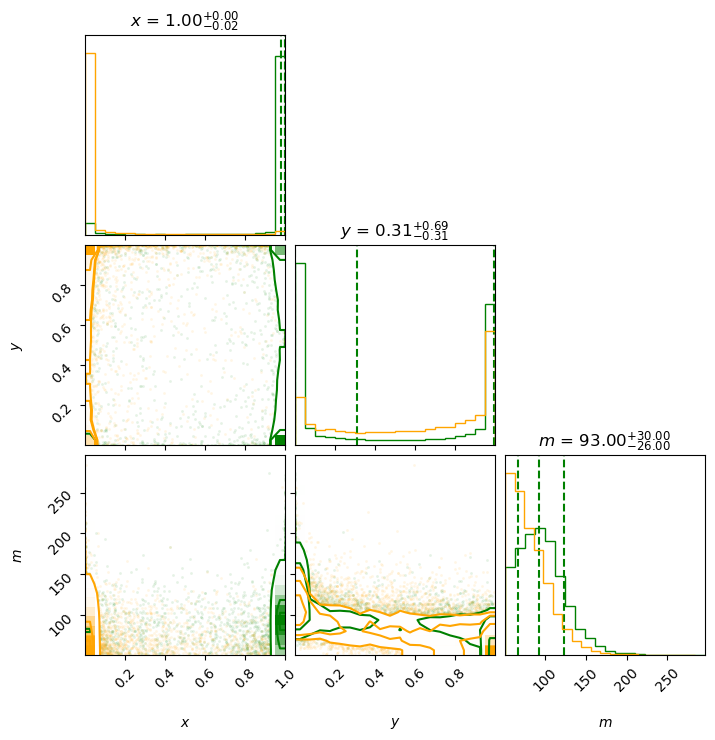

In [4]:
torch.cuda.empty_cache()
test_codec_model               = codec_model(3,dataset1,dataset2,iCorr=0.1,cor_nspace=[0],iCorr1=1,acor_nspace=[],iCorr2=0,n_epochs=75,n_epochs_mse=15,batch_size=1000)
scores_out,labels_out,mass_out,space_out = test_codec_model.run_all() 
plotAll(scores_out,labels_out,mass_out,space_out,theta,mass,label,0.5,0.5)

Epoch: 0 LOSS train: 1.0831 valid: 0.9920 clr: 0.0000 var: 0.9898 cor: 0.0933 corr1: 0.0000 corr2: 0.0000
Epoch: 1 LOSS train: 0.9962 valid: 0.9901 clr: 0.0000 var: 0.9897 cor: 0.0065 corr1: 0.0000 corr2: 0.0000
Epoch: 2 LOSS train: 0.9928 valid: 0.9919 clr: 0.0000 var: 0.9896 cor: 0.0031 corr1: 0.0000 corr2: 0.0000
Epoch: 3 LOSS train: 0.9954 valid: 0.9938 clr: 0.0000 var: 0.9896 cor: 0.0057 corr1: 0.0000 corr2: 0.0000
Epoch: 4 LOSS train: 0.9967 valid: 0.9945 clr: 0.0000 var: 0.9896 cor: 0.0071 corr1: 0.0000 corr2: 0.0000
Epoch: 5 LOSS train: 0.9978 valid: 0.9953 clr: 0.0000 var: 0.9896 cor: 0.0082 corr1: 0.0000 corr2: 0.0000
Epoch: 6 LOSS train: 0.9978 valid: 0.9955 clr: 0.0000 var: 0.9895 cor: 0.0082 corr1: 0.0000 corr2: 0.0000
Epoch: 7 LOSS train: 0.9971 valid: 0.9950 clr: 0.0000 var: 0.9895 cor: 0.0076 corr1: 0.0000 corr2: 0.0000
Epoch: 8 LOSS train: 0.9962 valid: 0.9947 clr: 0.0000 var: 0.9894 cor: 0.0067 corr1: 0.0000 corr2: 0.0000
Epoch: 9 LOSS train: 0.9955 valid: 0.9941 clr:

Epoch: 3 LOSS train: 0.07586881518363953 valid: 0.07582958042621613
Epoch: 4 LOSS train: 0.07585692405700684 valid: 0.07580894231796265
Epoch: 5 LOSS train: 0.07584705203771591 valid: 0.0757884532213211
Epoch: 6 LOSS train: 0.07583580911159515 valid: 0.07576709985733032
Epoch: 7 LOSS train: 0.07582502067089081 valid: 0.07575054466724396
Epoch: 8 LOSS train: 0.07581667602062225 valid: 0.07573521137237549
Epoch: 9 LOSS train: 0.07580853998661041 valid: 0.07572212815284729
Epoch: 10 LOSS train: 0.07580018043518066 valid: 0.07570821046829224
Epoch: 11 LOSS train: 0.07579156756401062 valid: 0.07569721341133118
Epoch: 12 LOSS train: 0.07578261941671371 valid: 0.07568661868572235
Epoch: 13 LOSS train: 0.07577288895845413 valid: 0.07567621022462845
Epoch: 14 LOSS train: 0.0757615715265274 valid: 0.07566489279270172
AUC 0.9474171503159907
test -0.050400017900845445 0.01658613994030454
test 0.7058766755692714 0.48316267866016693
test -0.19342934482033253 -0.13492265241503987


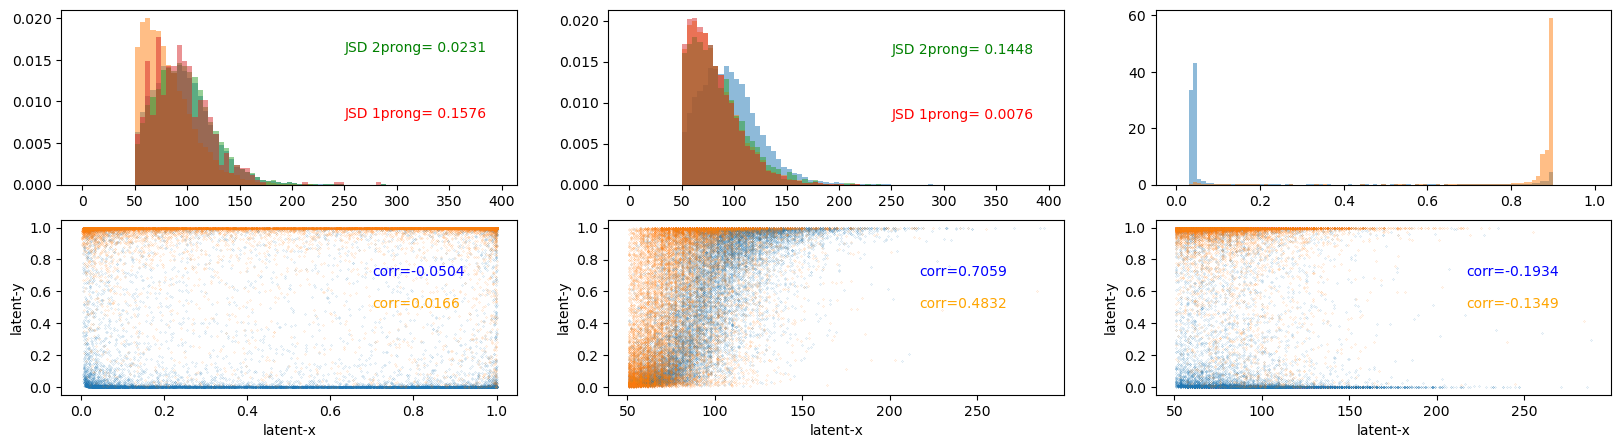

/storage/local/data1/home/pharris/mambaforge/envs/torchsort/lib/python3.10/site-packages/numpy/lib/histograms.py:906: RuntimeWarning: invalid value encountered in divide
  return n/db/n.sum(), bin_edges
/storage/local/data1/home/pharris/mambaforge/envs/torchsort/lib/python3.10/site-packages/numpy/lib/histograms.py:906: RuntimeWarning: divide by zero encountered in divide
  return n/db/n.sum(), bin_edges


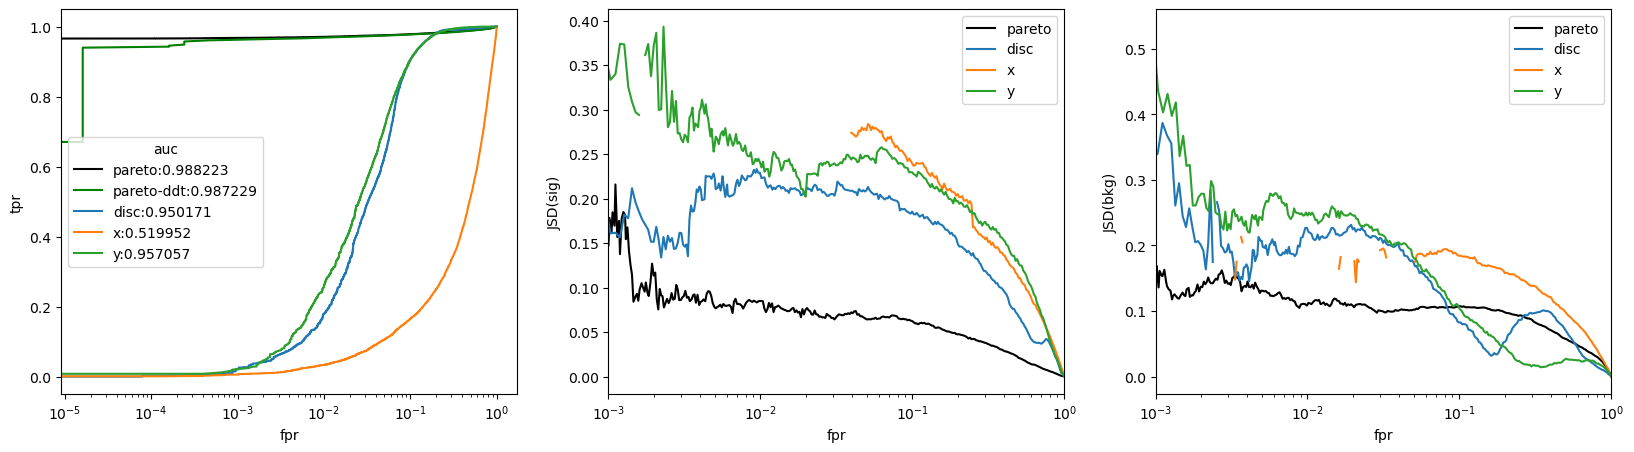

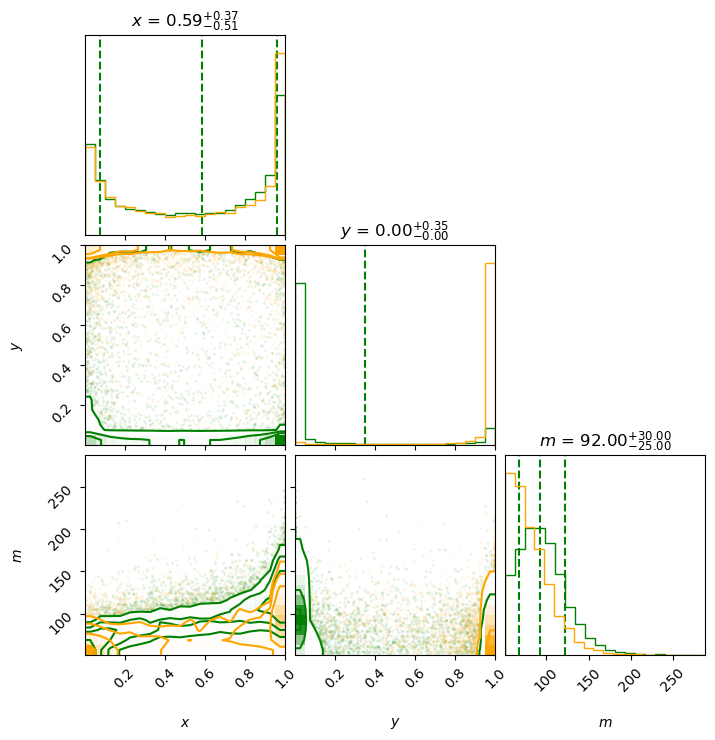

In [5]:
torch.cuda.empty_cache()
test_codec_model               = codec_model(3,dataset1,dataset2,iCorr=1.0,cor_nspace=[],iCorr1=0,acor_nspace=[],iCorr2=0,n_epochs=75,n_epochs_mse=15,batch_size=1000)
scores_out,labels_out,mass_out,space_out = test_codec_model.run_all() 
plotAll(scores_out,labels_out,mass_out,space_out,theta,mass,label,0.5,0.5)

Epoch: 0 LOSS train: 3.1798 valid: 3.0004 clr: 0.0000 var: 0.9896 cor: 0.1902 corr1: 0.0150 corr2: 1.9850
Epoch: 1 LOSS train: 2.9942 valid: 2.9916 clr: 0.0000 var: 0.9890 cor: 0.0052 corr1: 0.0221 corr2: 1.9779
Epoch: 2 LOSS train: 2.9913 valid: 2.9896 clr: 0.0000 var: 0.9888 cor: 0.0025 corr1: 0.0220 corr2: 1.9780
Epoch: 3 LOSS train: 2.9908 valid: 2.9899 clr: 0.0000 var: 0.9887 cor: 0.0020 corr1: 0.0217 corr2: 1.9783
Epoch: 4 LOSS train: 2.9911 valid: 2.9898 clr: 0.0000 var: 0.9886 cor: 0.0024 corr1: 0.0216 corr2: 1.9784
Epoch: 5 LOSS train: 2.9911 valid: 2.9902 clr: 0.0001 var: 0.9886 cor: 0.0025 corr1: 0.0213 corr2: 1.9787
Epoch: 6 LOSS train: 2.9913 valid: 2.9904 clr: 0.0001 var: 0.9885 cor: 0.0027 corr1: 0.0209 corr2: 1.9791
Epoch: 7 LOSS train: 2.9913 valid: 2.9902 clr: 0.0001 var: 0.9884 cor: 0.0029 corr1: 0.0205 corr2: 1.9795
Epoch: 8 LOSS train: 2.9911 valid: 2.9899 clr: 0.0001 var: 0.9883 cor: 0.0027 corr1: 0.0198 corr2: 1.9802
Epoch: 9 LOSS train: 2.9907 valid: 2.9896 clr:

Epoch: 3 LOSS train: 0.07313123345375061 valid: 0.07716202735900879
Epoch: 4 LOSS train: 0.07307133078575134 valid: 0.07704130560159683
Epoch: 5 LOSS train: 0.07290471345186234 valid: 0.07677857577800751
Epoch: 6 LOSS train: 0.07265044003725052 valid: 0.07645697891712189
Epoch: 7 LOSS train: 0.07238462567329407 valid: 0.07613939046859741
Epoch: 8 LOSS train: 0.0721384584903717 valid: 0.07583872228860855
Epoch: 9 LOSS train: 0.07189826667308807 valid: 0.07552353292703629
Epoch: 10 LOSS train: 0.07164649665355682 valid: 0.07520521432161331
Epoch: 11 LOSS train: 0.07137506455183029 valid: 0.07488623261451721
Epoch: 12 LOSS train: 0.07109390199184418 valid: 0.07456503063440323
Epoch: 13 LOSS train: 0.0708237737417221 valid: 0.07427240163087845
Epoch: 14 LOSS train: 0.07057107985019684 valid: 0.07401993125677109
AUC 0.9495740430549744
test 0.03252392919799695 -0.04949873345409251
test 0.6639590723554317 0.44951602086426934
test 0.16473471413175994 0.10854046968719486


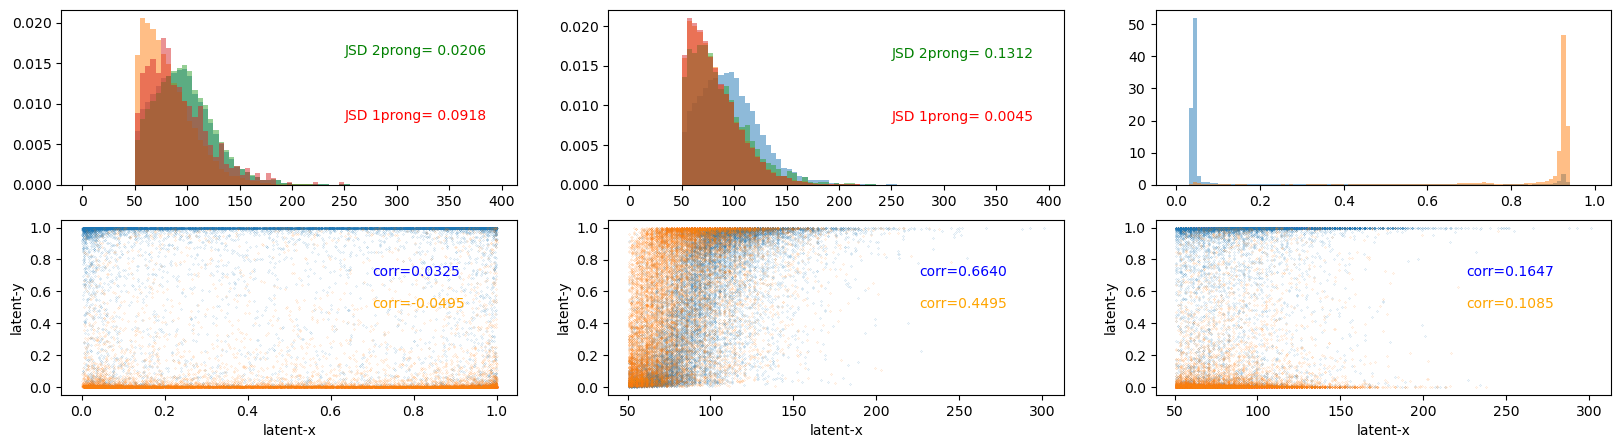

/storage/local/data1/home/pharris/mambaforge/envs/torchsort/lib/python3.10/site-packages/numpy/lib/histograms.py:906: RuntimeWarning: invalid value encountered in divide
  return n/db/n.sum(), bin_edges


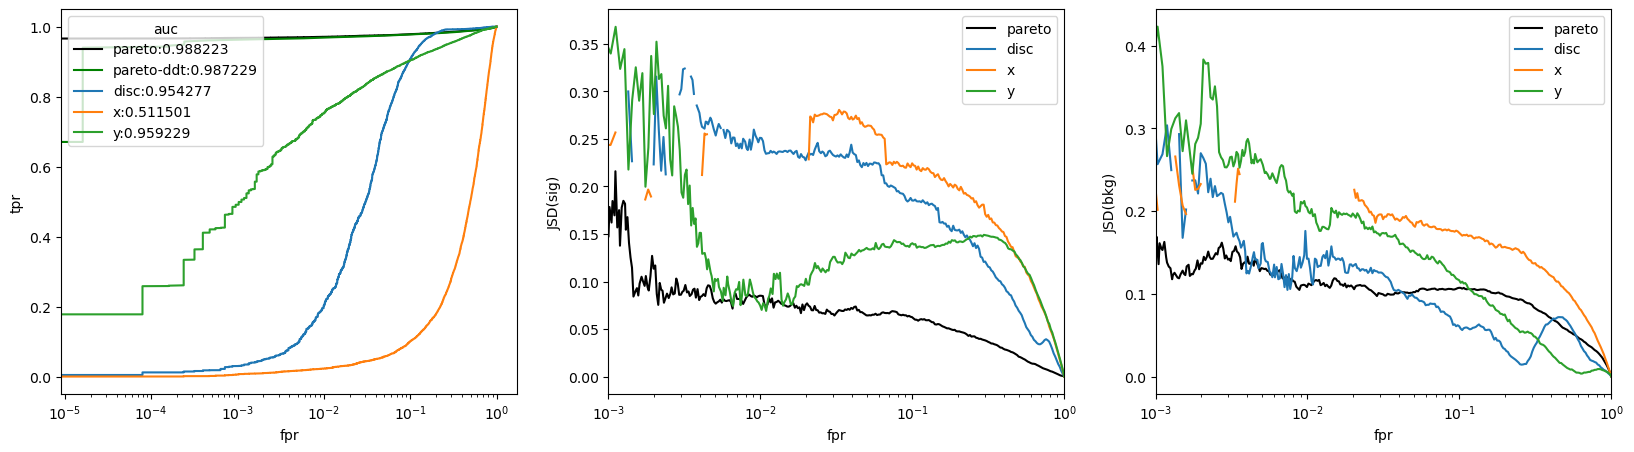

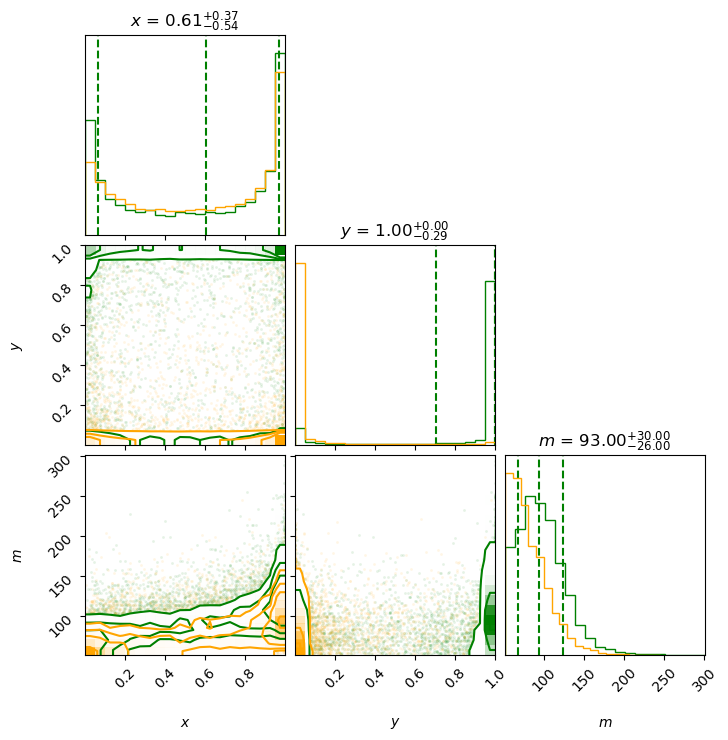

In [6]:
torch.cuda.empty_cache()
test_codec_model               = codec_model(3,dataset1,dataset2,iCorr=1.0,cor_nspace=[1],iCorr1=1.0,acor_nspace=[1],iCorr2=1.0,n_epochs=75,n_epochs_mse=15,batch_size=1000)
scores_out,labels_out,mass_out,space_out = test_codec_model.run_all() 
plotAll(scores_out,labels_out,mass_out,space_out,theta,mass,label,0.5,0.5)

Epoch: 0 LOSS train: 1.5660 valid: 1.2518 clr: 0.0000 var: 0.9895 cor: 0.3721 corr1: 0.0048 corr2: 0.1996
Epoch: 1 LOSS train: 1.2153 valid: 1.1957 clr: 0.0000 var: 0.9893 cor: 0.0230 corr1: 0.0032 corr2: 0.1998
Epoch: 2 LOSS train: 1.1951 valid: 1.1956 clr: 0.0000 var: 0.9892 cor: 0.0034 corr1: 0.0026 corr2: 0.1998
Epoch: 3 LOSS train: 1.1933 valid: 1.1950 clr: 0.0000 var: 0.9892 cor: 0.0025 corr1: 0.0018 corr2: 0.1998
Epoch: 4 LOSS train: 1.1930 valid: 1.1948 clr: 0.0000 var: 0.9892 cor: 0.0026 corr1: 0.0013 corr2: 0.1998
Epoch: 5 LOSS train: 1.1929 valid: 1.1938 clr: 0.0000 var: 0.9892 cor: 0.0029 corr1: 0.0011 corr2: 0.1998
Epoch: 6 LOSS train: 1.1929 valid: 1.1922 clr: 0.0000 var: 0.9891 cor: 0.0030 corr1: 0.0009 corr2: 0.1998
Epoch: 7 LOSS train: 1.1926 valid: 1.1912 clr: 0.0000 var: 0.9891 cor: 0.0029 corr1: 0.0008 corr2: 0.1997
Epoch: 8 LOSS train: 1.1923 valid: 1.1910 clr: 0.0000 var: 0.9891 cor: 0.0028 corr1: 0.0007 corr2: 0.1997
Epoch: 9 LOSS train: 1.1922 valid: 1.1909 clr:

Epoch: 3 LOSS train: 0.08177059143781662 valid: 0.08136072009801865
Epoch: 4 LOSS train: 0.08151673525571823 valid: 0.08115024119615555
Epoch: 5 LOSS train: 0.08125431835651398 valid: 0.08088602870702744
Epoch: 6 LOSS train: 0.0809275284409523 valid: 0.08058374375104904
Epoch: 7 LOSS train: 0.08064032346010208 valid: 0.08034113794565201
Epoch: 8 LOSS train: 0.08039094507694244 valid: 0.08011796325445175
Epoch: 9 LOSS train: 0.08016131818294525 valid: 0.07990147918462753
Epoch: 10 LOSS train: 0.07994440943002701 valid: 0.0797061026096344
Epoch: 11 LOSS train: 0.07973931729793549 valid: 0.07952576130628586
Epoch: 12 LOSS train: 0.0795549601316452 valid: 0.07935426384210587
Epoch: 13 LOSS train: 0.07939577102661133 valid: 0.07921946048736572
Epoch: 14 LOSS train: 0.07925663888454437 valid: 0.0790836364030838
AUC 0.9481314709093309
test 0.14236445903222053 0.5288567554162652
test -0.1100345181543784 -0.30419324727383207
test -0.751353324327678 -0.5647225135606915


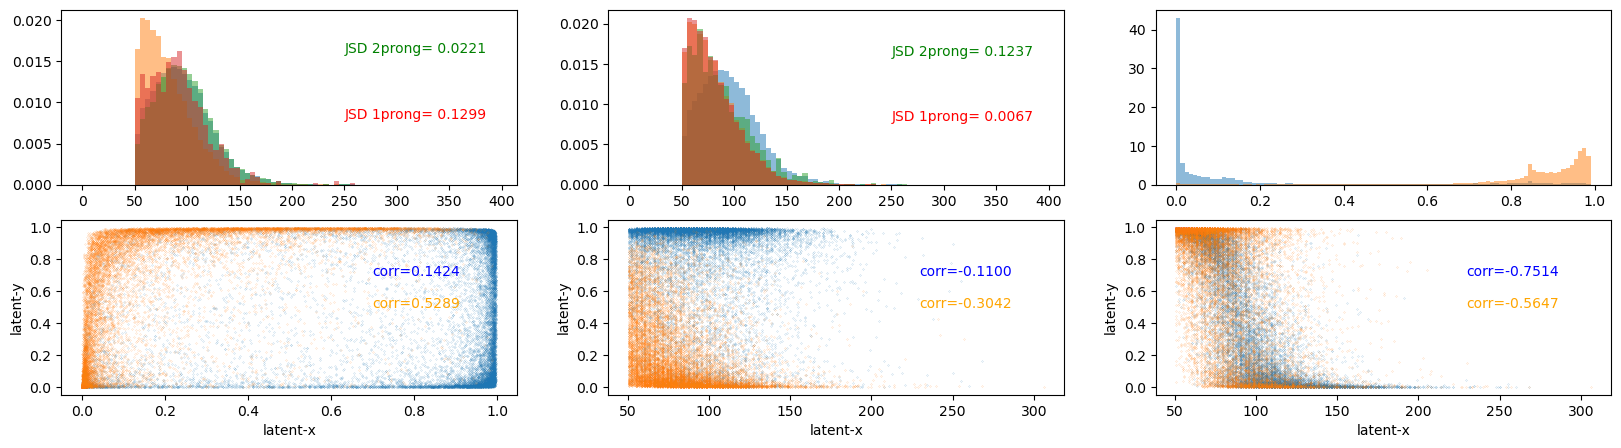

/storage/local/data1/home/pharris/mambaforge/envs/torchsort/lib/python3.10/site-packages/numpy/lib/histograms.py:906: RuntimeWarning: invalid value encountered in divide
  return n/db/n.sum(), bin_edges


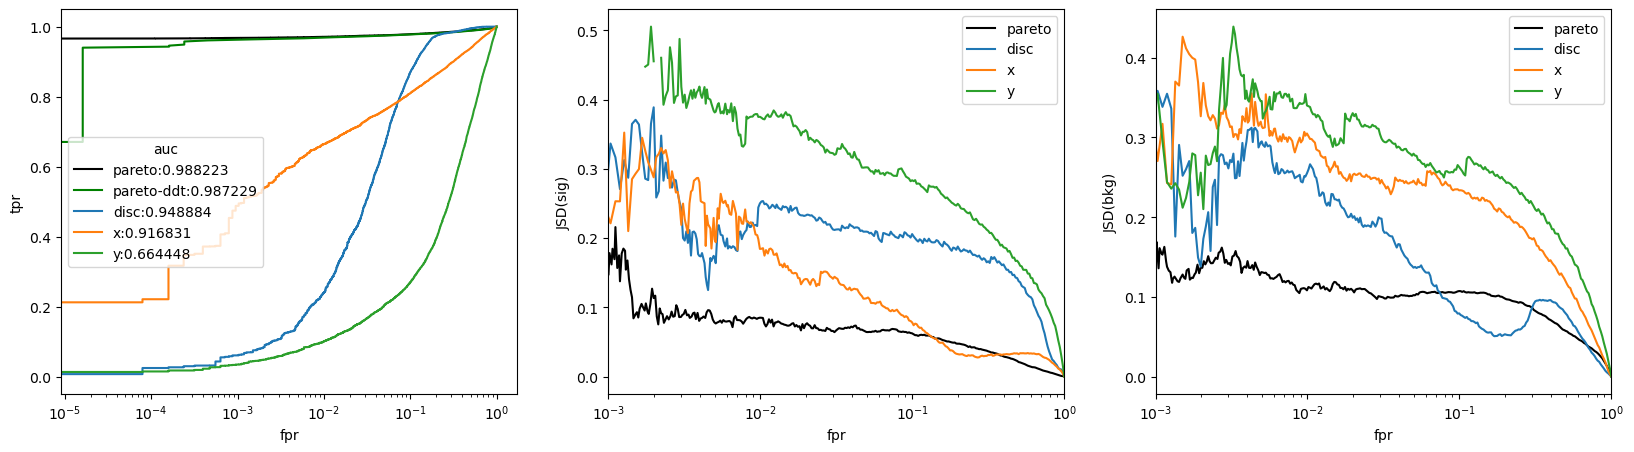

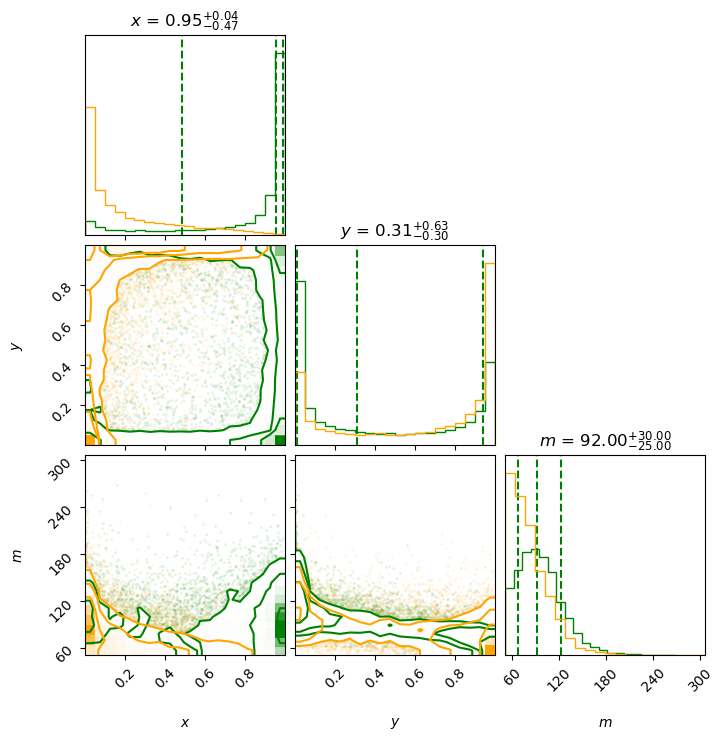

In [9]:
torch.cuda.empty_cache()
test_codec_model               = codec_model(3,dataset1,dataset2,iCorr=1.0,cor_nspace=[0],iCorr1=1.0,acor_nspace=[1],iCorr2=0.1,n_epochs=75,n_epochs_mse=15,batch_size=1000)
scores_out,labels_out,mass_out,space_out = test_codec_model.run_all() 
plotAll(scores_out,labels_out,mass_out,space_out,theta,mass,label,0.5,0.5)

Epoch: 0 LOSS train: 1.0108 valid: 0.9901 clr: 0.0000 var: 0.9896 cor: 0.0197 corr1: 0.0015 corr2: 0.0000
Epoch: 1 LOSS train: 0.9899 valid: 0.9893 clr: 0.0000 var: 0.9889 cor: 0.0005 corr1: 0.0005 corr2: 0.0000
Epoch: 2 LOSS train: 0.9889 valid: 0.9886 clr: 0.0001 var: 0.9883 cor: 0.0002 corr1: 0.0003 corr2: 0.0000
Epoch: 3 LOSS train: 0.9878 valid: 0.9870 clr: 0.0001 var: 0.9872 cor: 0.0002 corr1: 0.0003 corr2: 0.0000
Epoch: 4 LOSS train: 0.9852 valid: 0.9826 clr: 0.0002 var: 0.9845 cor: 0.0002 corr1: 0.0003 corr2: 0.0000
Epoch: 5 LOSS train: 0.9770 valid: 0.9674 clr: 0.0008 var: 0.9757 cor: 0.0002 corr1: 0.0003 corr2: 0.0000
Epoch: 6 LOSS train: 0.9465 valid: 0.9146 clr: 0.0064 var: 0.9395 cor: 0.0002 corr1: 0.0003 corr2: 0.0000
Epoch: 7 LOSS train: 0.8795 valid: 0.8460 clr: 0.0445 var: 0.8340 cor: 0.0003 corr1: 0.0007 corr2: 0.0000
Epoch: 8 LOSS train: 0.8259 valid: 0.8126 clr: 0.1184 var: 0.7066 cor: 0.0002 corr1: 0.0007 corr2: 0.0000
Epoch: 9 LOSS train: 0.7960 valid: 0.7908 clr:

Epoch: 3 LOSS train: 0.05914640426635742 valid: 0.05966050177812576
Epoch: 4 LOSS train: 0.05897822231054306 valid: 0.05951083451509476
Epoch: 5 LOSS train: 0.05882926285266876 valid: 0.05938833951950073
Epoch: 6 LOSS train: 0.058705464005470276 valid: 0.05929660424590111
Epoch: 7 LOSS train: 0.05859052762389183 valid: 0.05918692797422409
Epoch: 8 LOSS train: 0.05845695734024048 valid: 0.05905532091856003
Epoch: 9 LOSS train: 0.05830177664756775 valid: 0.05889878794550896
Epoch: 10 LOSS train: 0.058130450546741486 valid: 0.05873076617717743
Epoch: 11 LOSS train: 0.057952143251895905 valid: 0.05855373665690422
Epoch: 12 LOSS train: 0.05777580291032791 valid: 0.058387551456689835
Epoch: 13 LOSS train: 0.05760902911424637 valid: 0.05824035033583641
Epoch: 14 LOSS train: 0.05745769292116165 valid: 0.05812539905309677
AUC 0.9567521245447405
test -0.08081037298239409 0.1684730293634955
test 0.6705107345816458 -0.555373290418932
test -0.17128828648244349 -0.09926551154039771


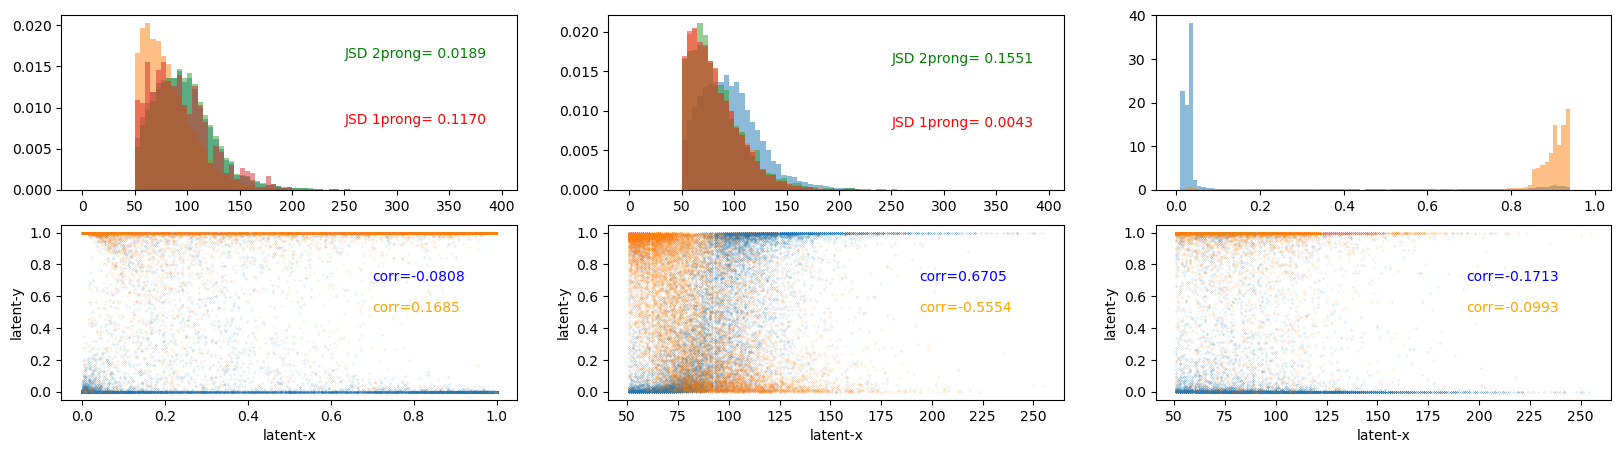

/storage/local/data1/home/pharris/mambaforge/envs/torchsort/lib/python3.10/site-packages/numpy/lib/histograms.py:906: RuntimeWarning: invalid value encountered in divide
  return n/db/n.sum(), bin_edges


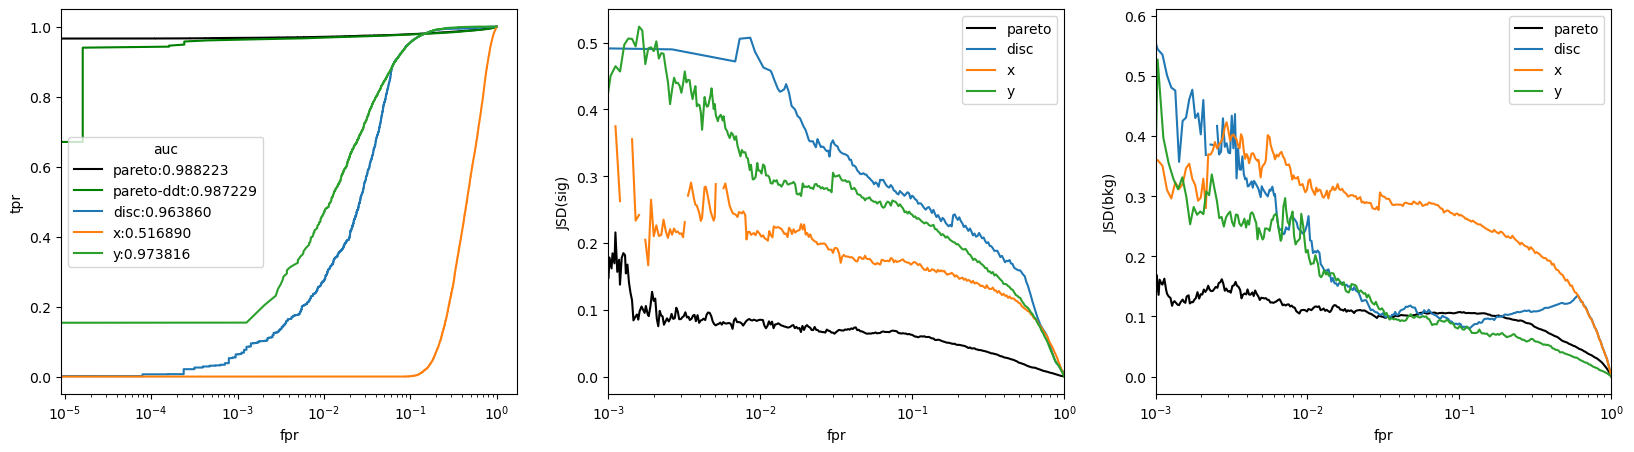

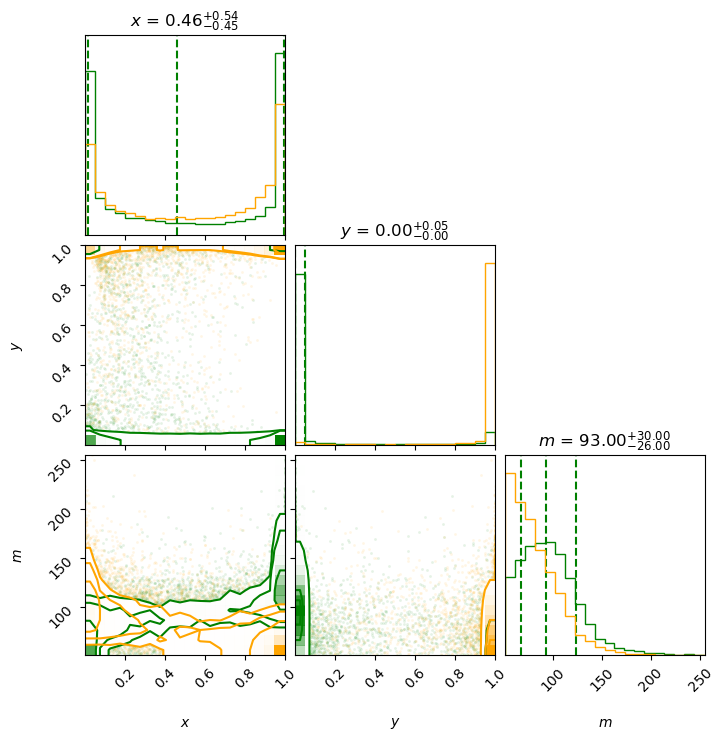

In [10]:
torch.cuda.empty_cache()
test_codec_model               = codec_model(3,dataset1,dataset2,iCorr=0.1,cor_nspace=[0],iCorr1=1.0,acor_nspace=[],iCorr2=0,n_epochs=75,n_epochs_mse=15,batch_size=1000)
scores_out,labels_out,mass_out,space_out = test_codec_model.run_all() 
plotAll(scores_out,labels_out,mass_out,space_out,theta,mass,label,0.5,0.5)

Epoch: 0 LOSS train: 1.0212 valid: 0.9978 clr: 0.0000 var: 0.9897 cor: 0.0171 corr1: 0.0144 corr2: 0.0000
Epoch: 1 LOSS train: 0.9943 valid: 0.9938 clr: 0.0000 var: 0.9893 cor: 0.0007 corr1: 0.0043 corr2: 0.0000
Epoch: 2 LOSS train: 0.9927 valid: 0.9925 clr: 0.0000 var: 0.9891 cor: 0.0003 corr1: 0.0033 corr2: 0.0000
Epoch: 3 LOSS train: 0.9922 valid: 0.9921 clr: 0.0000 var: 0.9890 cor: 0.0002 corr1: 0.0030 corr2: 0.0000
Epoch: 4 LOSS train: 0.9918 valid: 0.9918 clr: 0.0000 var: 0.9888 cor: 0.0002 corr1: 0.0027 corr2: 0.0000
Epoch: 5 LOSS train: 0.9914 valid: 0.9913 clr: 0.0001 var: 0.9886 cor: 0.0002 corr1: 0.0025 corr2: 0.0000
Epoch: 6 LOSS train: 0.9909 valid: 0.9908 clr: 0.0001 var: 0.9883 cor: 0.0003 corr1: 0.0023 corr2: 0.0000
Epoch: 7 LOSS train: 0.9902 valid: 0.9900 clr: 0.0001 var: 0.9877 cor: 0.0003 corr1: 0.0021 corr2: 0.0000
Epoch: 8 LOSS train: 0.9892 valid: 0.9885 clr: 0.0001 var: 0.9867 cor: 0.0003 corr1: 0.0020 corr2: 0.0000
Epoch: 9 LOSS train: 0.9872 valid: 0.9856 clr:

Exception ignored in: <function _MultiProcessingDataLoaderIter.__del__ at 0x7fa768b61d80>
Traceback (most recent call last):
  File "/storage/local/data1/home/pharris/mambaforge/envs/torchsort/lib/python3.10/site-packages/torch/utils/data/dataloader.py", line 1510, in __del__
    self._shutdown_workers()
  File "/storage/local/data1/home/pharris/mambaforge/envs/torchsort/lib/python3.10/site-packages/torch/utils/data/dataloader.py", line 1493, in _shutdown_workers
    if w.is_alive():
  File "/storage/local/data1/home/pharris/mambaforge/envs/torchsort/lib/python3.10/multiprocessing/process.py", line 160, in is_alive
    assert self._parent_pid == os.getpid(), 'can only test a child process'
AssertionError: can only test a child process
Exception ignored in: 
<function _MultiProcessingDataLoaderIter.__del__ at 0x7fa768b61d80>Traceback (most recent call last):
  File "/storage/local/data1/home/pharris/mambaforge/envs/torchsort/lib/python3.10/site-packages/torch/utils/data/dataloader.py", 

Epoch: 0 LOSS train: 0.1064753532409668 valid: 0.06218646094202995
Epoch: 1 LOSS train: 0.06439924985170364 valid: 0.0617457740008831
Epoch: 2 LOSS train: 0.06414718180894852 valid: 0.061578281223773956
Epoch: 3 LOSS train: 0.06401906162500381 valid: 0.061473917216062546
Epoch: 4 LOSS train: 0.06393519043922424 valid: 0.061409659683704376
Epoch: 5 LOSS train: 0.06387938559055328 valid: 0.06135481595993042
Epoch: 6 LOSS train: 0.06381991505622864 valid: 0.06128852069377899
Epoch: 7 LOSS train: 0.06375139206647873 valid: 0.0611870214343071
Epoch: 8 LOSS train: 0.06366429477930069 valid: 0.06106596440076828
Epoch: 9 LOSS train: 0.06356579810380936 valid: 0.06093544512987137


Exception ignored in: 
<function _MultiProcessingDataLoaderIter.__del__ at 0x7fa768b61d80>Traceback (most recent call last):
  File "/storage/local/data1/home/pharris/mambaforge/envs/torchsort/lib/python3.10/site-packages/torch/utils/data/dataloader.py", line 1510, in __del__
    self._shutdown_workers()
  File "/storage/local/data1/home/pharris/mambaforge/envs/torchsort/lib/python3.10/site-packages/torch/utils/data/dataloader.py", line 1493, in _shutdown_workers
    if w.is_alive():
  File "/storage/local/data1/home/pharris/mambaforge/envs/torchsort/lib/python3.10/multiprocessing/process.py", line 160, in is_alive
    assert self._parent_pid == os.getpid(), 'can only test a child process'
AssertionError: can only test a child process
Exception ignored in: <function _MultiProcessingDataLoaderIter.__del__ at 0x7fa768b61d80>
Traceback (most recent call last):
  File "/storage/local/data1/home/pharris/mambaforge/envs/torchsort/lib/python3.10/site-packages/torch/utils/data/dataloader.py", 

Epoch: 10 LOSS train: 0.06345685571432114 valid: 0.06080712750554085
Epoch: 11 LOSS train: 0.0633370503783226 valid: 0.06066980957984924


Exception ignored in: Exception ignored in: <function _MultiProcessingDataLoaderIter.__del__ at 0x7fa768b61d80><function _MultiProcessingDataLoaderIter.__del__ at 0x7fa768b61d80>
Traceback (most recent call last):

  File "/storage/local/data1/home/pharris/mambaforge/envs/torchsort/lib/python3.10/site-packages/torch/utils/data/dataloader.py", line 1510, in __del__
Traceback (most recent call last):
  File "/storage/local/data1/home/pharris/mambaforge/envs/torchsort/lib/python3.10/site-packages/torch/utils/data/dataloader.py", line 1510, in __del__
    self._shutdown_workers()    
self._shutdown_workers()  File "/storage/local/data1/home/pharris/mambaforge/envs/torchsort/lib/python3.10/site-packages/torch/utils/data/dataloader.py", line 1493, in _shutdown_workers

  File "/storage/local/data1/home/pharris/mambaforge/envs/torchsort/lib/python3.10/site-packages/torch/utils/data/dataloader.py", line 1493, in _shutdown_workers
    if w.is_alive():    
if w.is_alive():  File "/storage/local/

Epoch: 12 LOSS train: 0.06319817900657654 valid: 0.060549769550561905
Epoch: 13 LOSS train: 0.06303445994853973 valid: 0.06042046099901199
Epoch: 14 LOSS train: 0.06283913552761078 valid: 0.0602865032851696
AUC 0.9614423417362832


Exception ignored in: <function _MultiProcessingDataLoaderIter.__del__ at 0x7fa768b61d80>
Traceback (most recent call last):
  File "/storage/local/data1/home/pharris/mambaforge/envs/torchsort/lib/python3.10/site-packages/torch/utils/data/dataloader.py", line 1510, in __del__
    self._shutdown_workers()
  File "/storage/local/data1/home/pharris/mambaforge/envs/torchsort/lib/python3.10/site-packages/torch/utils/data/dataloader.py", line 1468, in _shutdown_workers
    if self._persistent_workers or self._workers_status[worker_id]:
AttributeError: '_MultiProcessingDataLoaderIter' object has no attribute '_workers_status'


test -0.10043456699330935 0.13142678322378284
test -0.4563070859095156 0.41656949134232457
test 0.20209353362526503 0.12985704915579407


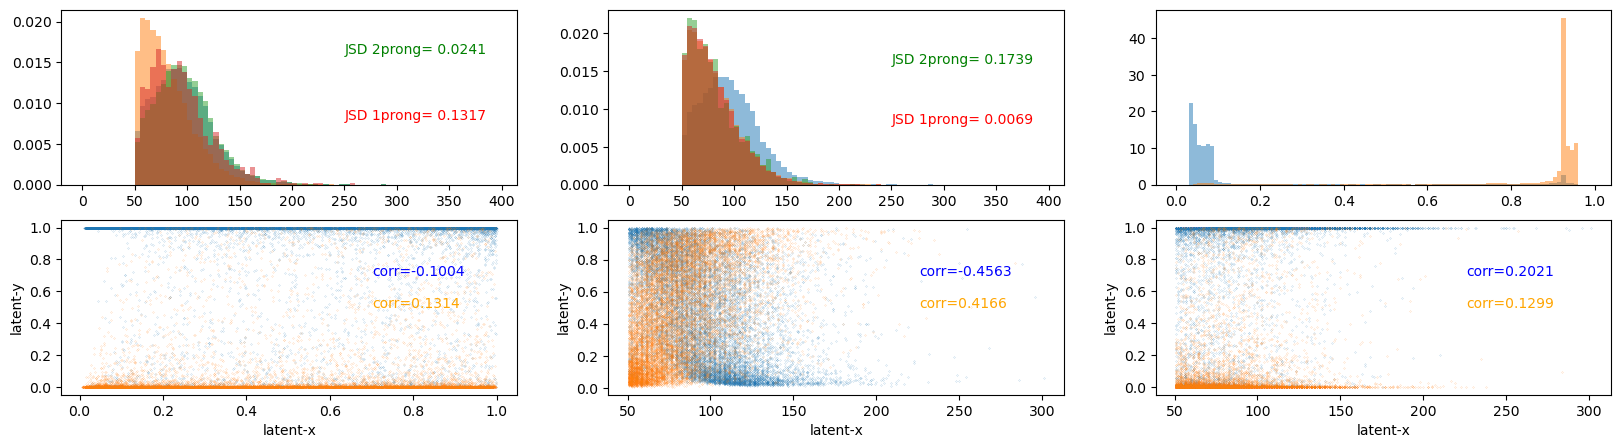

/storage/local/data1/home/pharris/mambaforge/envs/torchsort/lib/python3.10/site-packages/numpy/lib/histograms.py:906: RuntimeWarning: invalid value encountered in divide
  return n/db/n.sum(), bin_edges


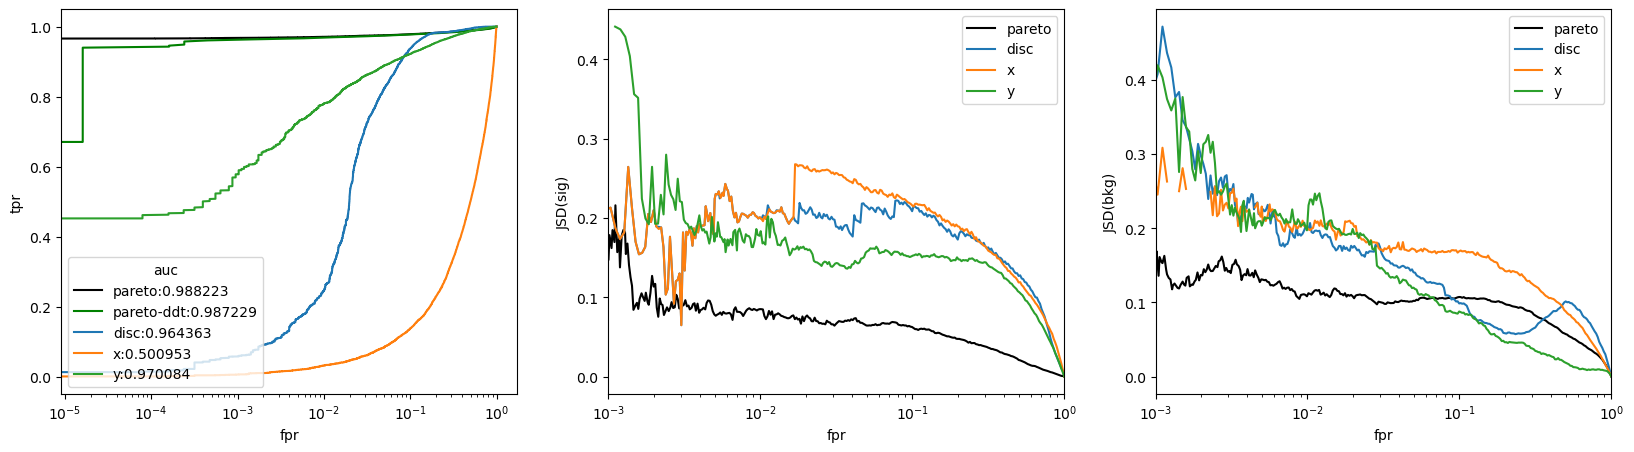

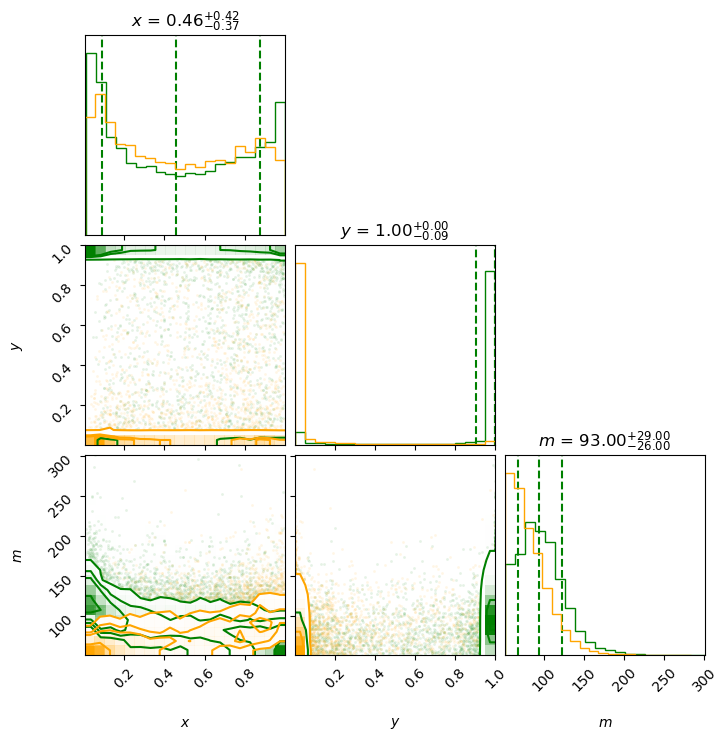

In [12]:
torch.cuda.empty_cache()
test_codec_model               = codec_model(3,dataset1,dataset2,iCorr=0.1,cor_nspace=[0],iCorr1=10.0,acor_nspace=[],iCorr2=0,n_epochs=75,n_epochs_mse=15,batch_size=1000)
scores_out,labels_out,mass_out,space_out = test_codec_model.run_all() 
plotAll(scores_out,labels_out,mass_out,space_out,theta,mass,label,0.5,0.5)

Epoch: 0 LOSS train: 1.1382 valid: 1.0059 clr: 0.0000 var: 0.9896 cor: 0.1325 corr1: 0.0162 corr2: 0.0000
Epoch: 1 LOSS train: 1.0023 valid: 1.0010 clr: 0.0000 var: 0.9893 cor: 0.0031 corr1: 0.0099 corr2: 0.0000
Epoch: 2 LOSS train: 0.9971 valid: 0.9992 clr: 0.0000 var: 0.9891 cor: 0.0014 corr1: 0.0066 corr2: 0.0000
Epoch: 3 LOSS train: 0.9957 valid: 0.9971 clr: 0.0000 var: 0.9891 cor: 0.0019 corr1: 0.0046 corr2: 0.0000
Epoch: 4 LOSS train: 0.9947 valid: 0.9957 clr: 0.0000 var: 0.9890 cor: 0.0021 corr1: 0.0035 corr2: 0.0000
Epoch: 5 LOSS train: 0.9937 valid: 0.9949 clr: 0.0000 var: 0.9890 cor: 0.0019 corr1: 0.0028 corr2: 0.0000
Epoch: 6 LOSS train: 0.9930 valid: 0.9945 clr: 0.0000 var: 0.9889 cor: 0.0017 corr1: 0.0023 corr2: 0.0000
Epoch: 7 LOSS train: 0.9927 valid: 0.9942 clr: 0.0000 var: 0.9889 cor: 0.0018 corr1: 0.0019 corr2: 0.0000
Epoch: 8 LOSS train: 0.9924 valid: 0.9938 clr: 0.0000 var: 0.9888 cor: 0.0019 corr1: 0.0016 corr2: 0.0000
Epoch: 9 LOSS train: 0.9921 valid: 0.9935 clr:

Epoch: 3 LOSS train: 0.07380101829767227 valid: 0.07072068005800247
Epoch: 4 LOSS train: 0.07366737723350525 valid: 0.07063374668359756
Epoch: 5 LOSS train: 0.07356158643960953 valid: 0.07056159526109695
Epoch: 6 LOSS train: 0.07346706092357635 valid: 0.0704808384180069
Epoch: 7 LOSS train: 0.07334867864847183 valid: 0.07037656009197235
Epoch: 8 LOSS train: 0.07320462912321091 valid: 0.07025138288736343
Epoch: 9 LOSS train: 0.07303758710622787 valid: 0.07010388374328613
Epoch: 10 LOSS train: 0.07284862548112869 valid: 0.06994203478097916
Epoch: 11 LOSS train: 0.07264411449432373 valid: 0.06976594775915146
Epoch: 12 LOSS train: 0.07242980599403381 valid: 0.06957434117794037
Epoch: 13 LOSS train: 0.07220648974180222 valid: 0.06937551498413086
Epoch: 14 LOSS train: 0.07198353856801987 valid: 0.06917204707860947
AUC 0.9574263999519839
test -0.023573484859903737 0.03712053297168828
test 0.13014180299526124 0.01373943656617605
test -0.05746560845713141 -0.24514037824814655


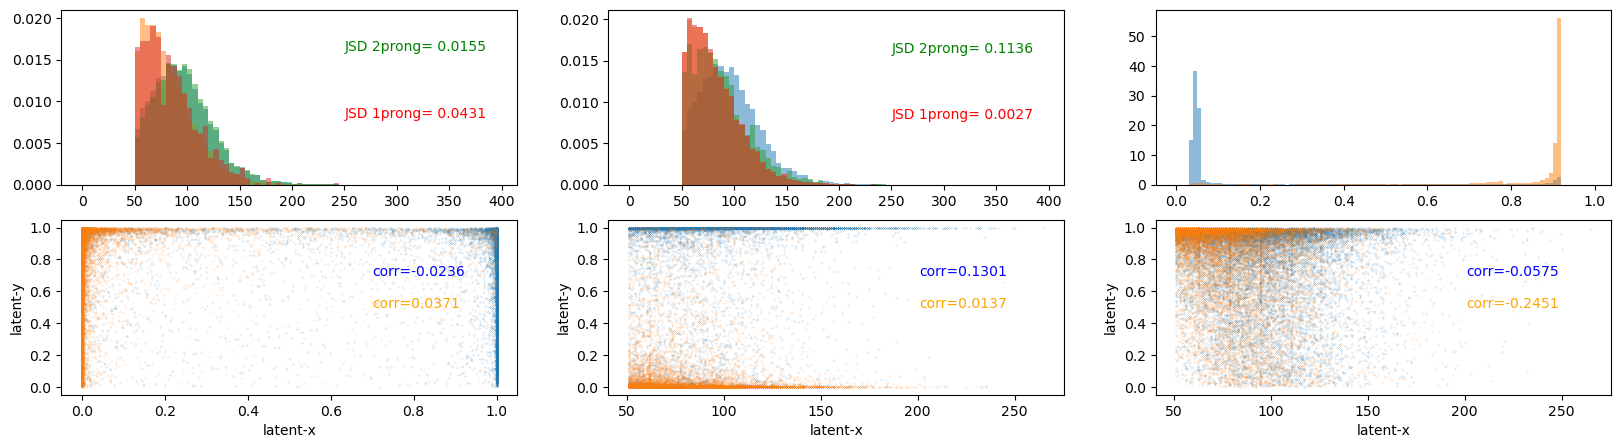

/storage/local/data1/home/pharris/mambaforge/envs/torchsort/lib/python3.10/site-packages/numpy/lib/histograms.py:906: RuntimeWarning: invalid value encountered in divide
  return n/db/n.sum(), bin_edges


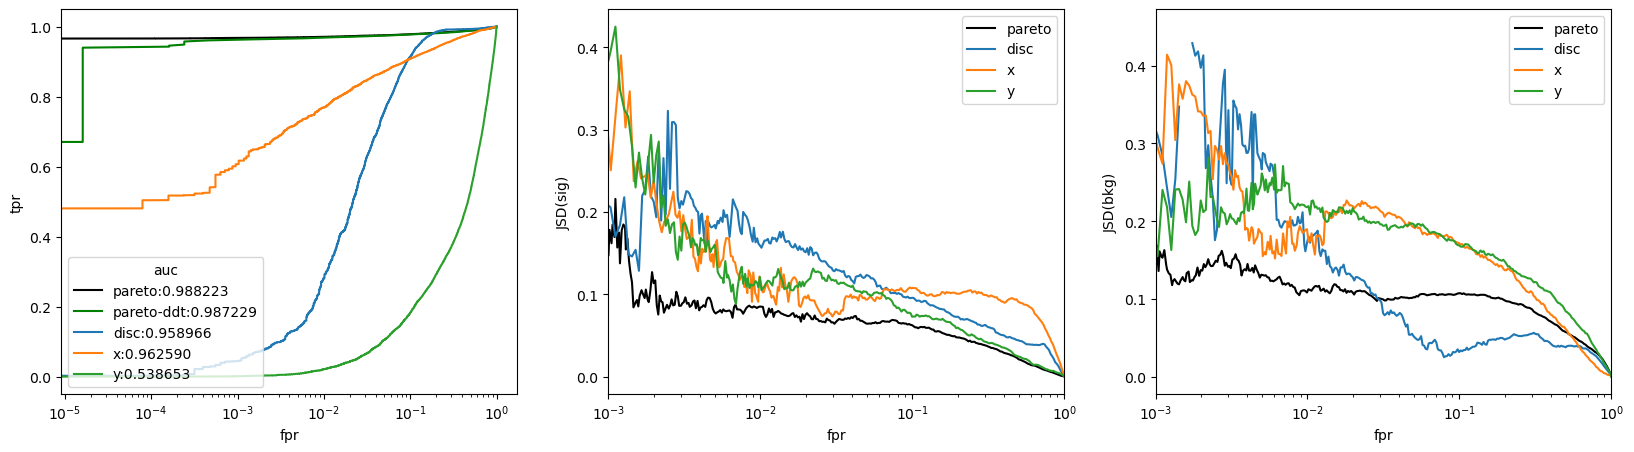

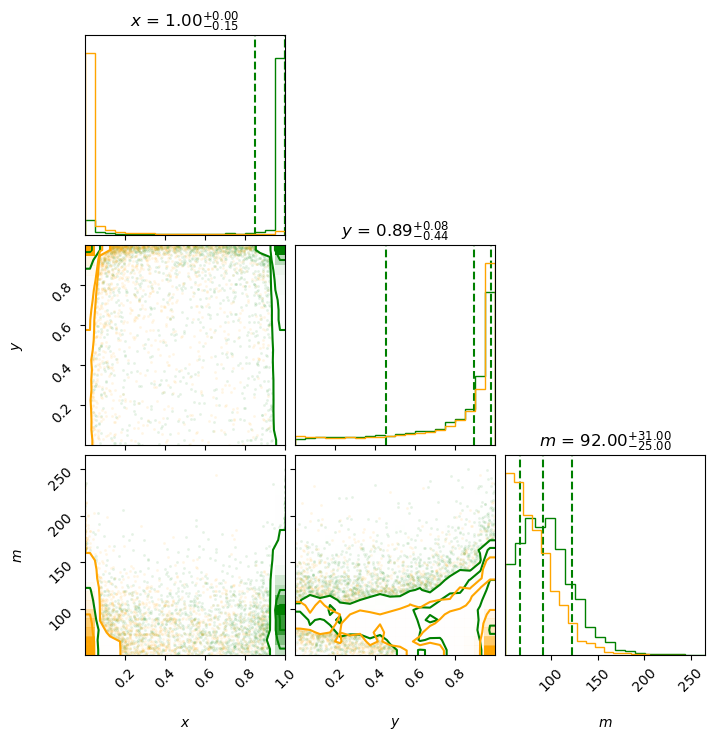

In [14]:
torch.cuda.empty_cache()
test_codec_model               = codec_model(3,dataset1,dataset2,iCorr=1.0,cor_nspace=[0,1],iCorr1=1.0,acor_nspace=[],iCorr2=0,n_epochs=75,n_epochs_mse=15,batch_size=1000)
scores_out,labels_out,mass_out,space_out = test_codec_model.run_all() 
plotAll(scores_out,labels_out,mass_out,space_out,theta,mass,label,0.5,0.5)

Epoch: 0 LOSS train: 1.2416 valid: 0.9931 clr: 0.0000 var: 0.9896 cor: 0.2502 corr1: 0.0018 corr2: 0.0000
Epoch: 1 LOSS train: 1.0221 valid: 0.9938 clr: 0.0000 var: 0.9890 cor: 0.0319 corr1: 0.0012 corr2: 0.0000
Epoch: 2 LOSS train: 1.0043 valid: 0.9917 clr: 0.0000 var: 0.9886 cor: 0.0146 corr1: 0.0011 corr2: 0.0000
Epoch: 3 LOSS train: 0.9975 valid: 0.9925 clr: 0.0001 var: 0.9884 cor: 0.0081 corr1: 0.0009 corr2: 0.0000
Epoch: 4 LOSS train: 0.9951 valid: 0.9948 clr: 0.0001 var: 0.9883 cor: 0.0060 corr1: 0.0007 corr2: 0.0000
Epoch: 5 LOSS train: 0.9944 valid: 0.9970 clr: 0.0001 var: 0.9882 cor: 0.0056 corr1: 0.0006 corr2: 0.0000
Epoch: 6 LOSS train: 0.9941 valid: 0.9973 clr: 0.0001 var: 0.9881 cor: 0.0055 corr1: 0.0005 corr2: 0.0000
Epoch: 7 LOSS train: 0.9935 valid: 0.9956 clr: 0.0001 var: 0.9880 cor: 0.0050 corr1: 0.0004 corr2: 0.0000
Epoch: 8 LOSS train: 0.9924 valid: 0.9933 clr: 0.0001 var: 0.9879 cor: 0.0041 corr1: 0.0003 corr2: 0.0000
Epoch: 9 LOSS train: 0.9913 valid: 0.9915 clr:

Epoch: 3 LOSS train: 0.06704553961753845 valid: 0.06439589709043503
Epoch: 4 LOSS train: 0.06685072183609009 valid: 0.06421250104904175
Epoch: 5 LOSS train: 0.06668552756309509 valid: 0.06405483931303024
Epoch: 6 LOSS train: 0.0665474683046341 valid: 0.06391298025846481
Epoch: 7 LOSS train: 0.06640922278165817 valid: 0.06375392526388168
Epoch: 8 LOSS train: 0.06625976413488388 valid: 0.0635826587677002
Epoch: 9 LOSS train: 0.0661039873957634 valid: 0.0634082481265068
Epoch: 10 LOSS train: 0.06595784425735474 valid: 0.06324630975723267
Epoch: 11 LOSS train: 0.06581351161003113 valid: 0.06308169662952423
Epoch: 12 LOSS train: 0.06567973643541336 valid: 0.06292997300624847
Epoch: 13 LOSS train: 0.06555154919624329 valid: 0.0627831220626831
Epoch: 14 LOSS train: 0.06543238461017609 valid: 0.06264551728963852
AUC 0.9656956782573002
test 0.06460436052576238 -0.10183931793683541
test -0.09604880668479562 0.05480283546413505
test -0.3546354134952146 -0.39620380605280087


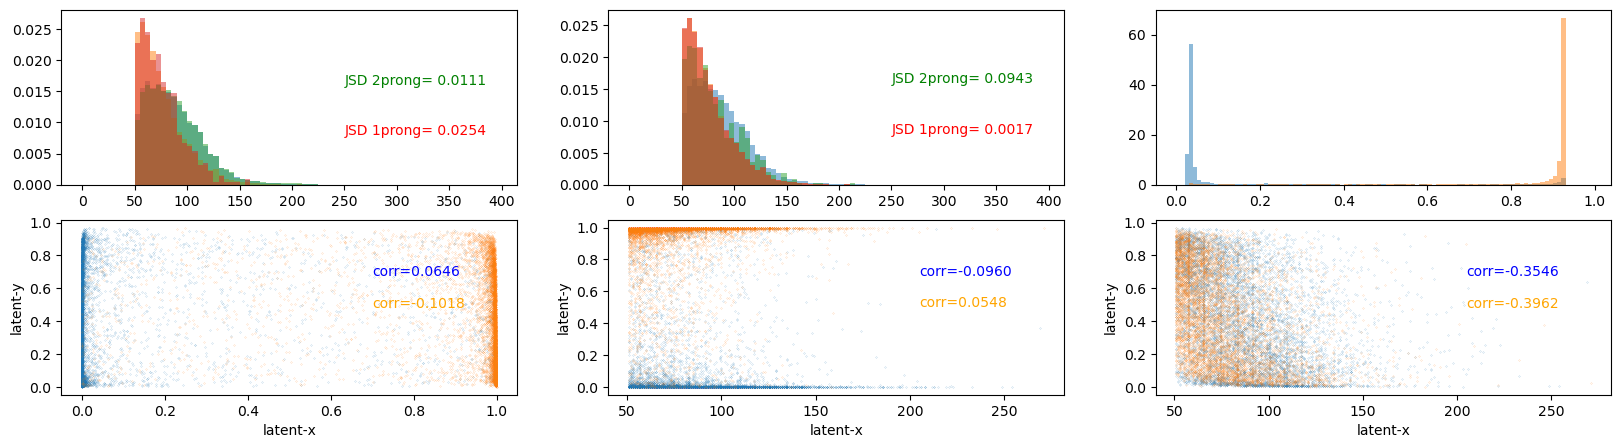

/storage/local/data1/home/pharris/test2/plot.py:87: RuntimeWarning: invalid value encountered in double_scalars
  pFrac=np.sum(hbkg[pMass,(nbinsV-pBin):nbinsV])/ np.sum(hbkg[pMass,:])
/storage/local/data1/home/pharris/mambaforge/envs/torchsort/lib/python3.10/site-packages/numpy/lib/histograms.py:906: RuntimeWarning: invalid value encountered in divide
  return n/db/n.sum(), bin_edges
/storage/local/data1/home/pharris/mambaforge/envs/torchsort/lib/python3.10/site-packages/numpy/lib/histograms.py:906: RuntimeWarning: divide by zero encountered in divide
  return n/db/n.sum(), bin_edges
/storage/local/data1/home/pharris/mambaforge/envs/torchsort/lib/python3.10/site-packages/scipy/spatial/distance.py:1287: RuntimeWarning: invalid value encountered in divide
  p = p / np.sum(p, axis=axis, keepdims=True)
/storage/local/data1/home/pharris/mambaforge/envs/torchsort/lib/python3.10/site-packages/scipy/spatial/distance.py:1288: RuntimeWarning: invalid value encountered in divide
  q = q / np.sum(

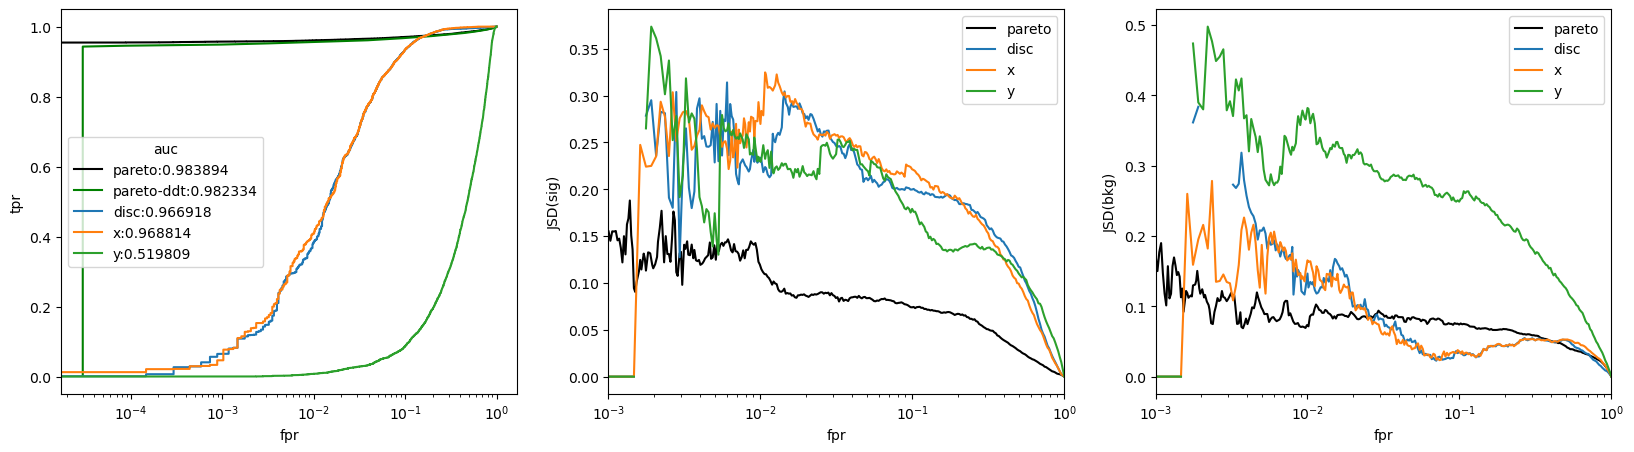

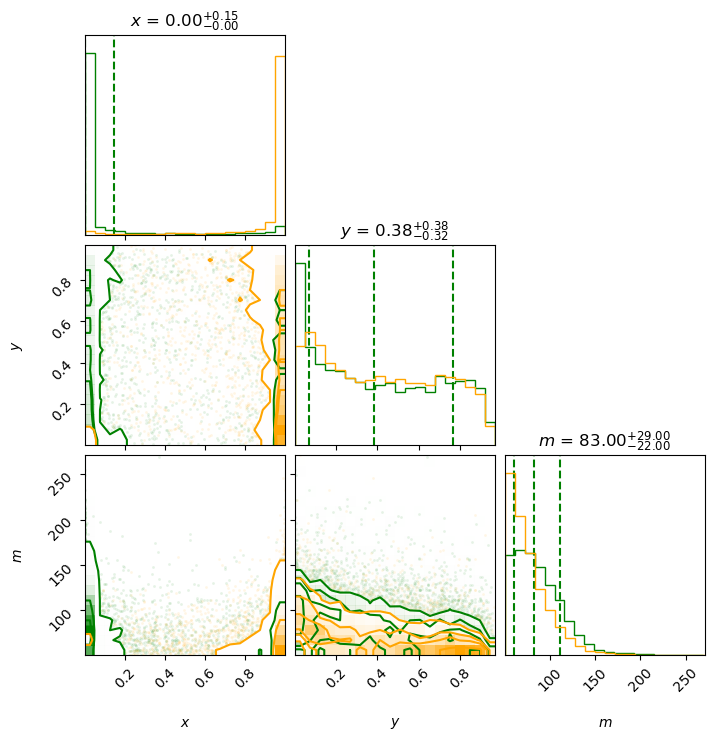

In [3]:
torch.cuda.empty_cache()
test_codec_model               = codec_model(3,dataset1,dataset2,iCorr=1.0,cor_nspace=[0],iCorr1=1.0,acor_nspace=[],iCorr2=0,n_epochs=75,n_epochs_mse=15,batch_size=1000)
scores_out,labels_out,mass_out,space_out = test_codec_model.run_all() 
plotAll(scores_out,labels_out,mass_out,space_out,theta,mass,label,0.5,0.5)

Epoch: 0 LOSS train: 1.0051 valid: 0.9906 clr: 0.0000 var: 0.9897 cor: 0.0144 corr1: 0.0009 corr2: 0.0000
Epoch: 1 LOSS train: 0.9910 valid: 0.9907 clr: 0.0000 var: 0.9894 cor: 0.0008 corr1: 0.0007 corr2: 0.0000
Epoch: 2 LOSS train: 0.9900 valid: 0.9900 clr: 0.0000 var: 0.9892 cor: 0.0001 corr1: 0.0006 corr2: 0.0000
Epoch: 3 LOSS train: 0.9898 valid: 0.9897 clr: 0.0000 var: 0.9891 cor: 0.0001 corr1: 0.0005 corr2: 0.0000
Epoch: 4 LOSS train: 0.9896 valid: 0.9895 clr: 0.0000 var: 0.9889 cor: 0.0002 corr1: 0.0004 corr2: 0.0000
Epoch: 5 LOSS train: 0.9893 valid: 0.9891 clr: 0.0000 var: 0.9887 cor: 0.0002 corr1: 0.0004 corr2: 0.0000
Epoch: 6 LOSS train: 0.9889 valid: 0.9886 clr: 0.0001 var: 0.9883 cor: 0.0002 corr1: 0.0003 corr2: 0.0000
Epoch: 7 LOSS train: 0.9884 valid: 0.9879 clr: 0.0001 var: 0.9878 cor: 0.0002 corr1: 0.0003 corr2: 0.0000
Epoch: 8 LOSS train: 0.9875 valid: 0.9867 clr: 0.0001 var: 0.9869 cor: 0.0003 corr1: 0.0002 corr2: 0.0000
Epoch: 9 LOSS train: 0.9858 valid: 0.9844 clr:

Epoch: 3 LOSS train: 0.04864845797419548 valid: 0.05126897990703583
Epoch: 4 LOSS train: 0.04844269901514053 valid: 0.05110574886202812
Epoch: 5 LOSS train: 0.04831620678305626 valid: 0.050958435982465744
Epoch: 6 LOSS train: 0.04820440337061882 valid: 0.05082882568240166
Epoch: 7 LOSS train: 0.048110414296388626 valid: 0.05072776600718498
Epoch: 8 LOSS train: 0.04802694916725159 valid: 0.05062949284911156
Epoch: 9 LOSS train: 0.04794355854392052 valid: 0.05053403973579407
Epoch: 10 LOSS train: 0.047859225422143936 valid: 0.05043093115091324
Epoch: 11 LOSS train: 0.04777255281805992 valid: 0.05032564699649811
Epoch: 12 LOSS train: 0.04768121987581253 valid: 0.050222333520650864
Epoch: 13 LOSS train: 0.04758952558040619 valid: 0.05010753124952316
Epoch: 14 LOSS train: 0.047499075531959534 valid: 0.04999658092856407
AUC 0.9768142007286033
test 0.11475950516696402 -0.16984556850530125
test -0.48886815231612163 0.333856717208498
test -0.1517171875531092 -0.07826062642586305


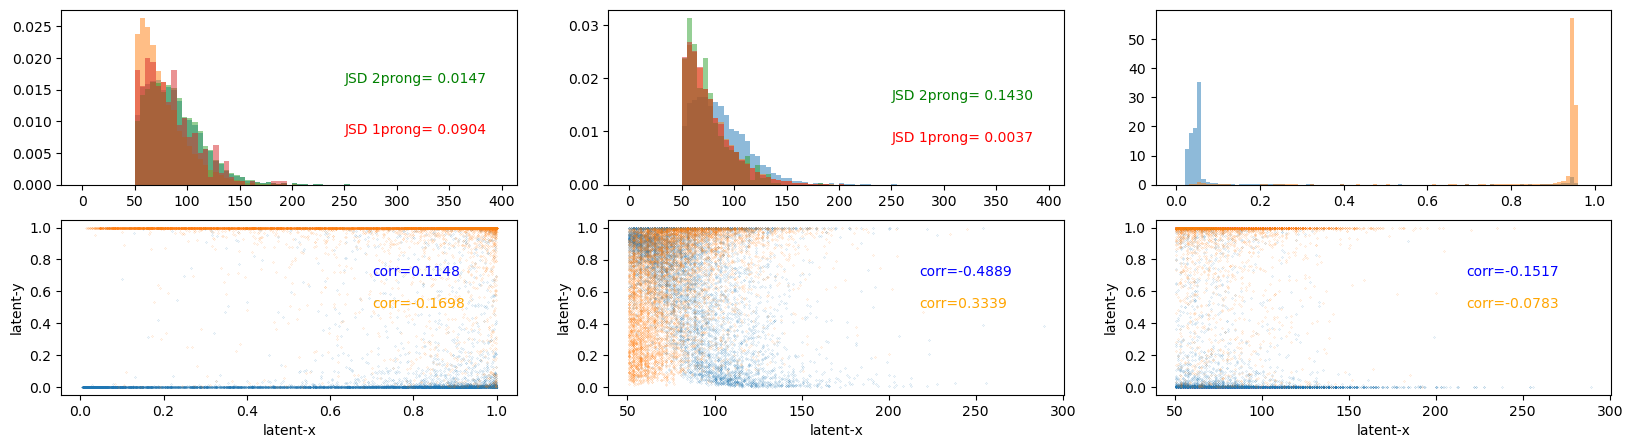

/storage/local/data1/home/pharris/test2/plot.py:87: RuntimeWarning: invalid value encountered in double_scalars
  pFrac=np.sum(hbkg[pMass,(nbinsV-pBin):nbinsV])/ np.sum(hbkg[pMass,:])
/storage/local/data1/home/pharris/mambaforge/envs/torchsort/lib/python3.10/site-packages/numpy/lib/histograms.py:906: RuntimeWarning: invalid value encountered in divide
  return n/db/n.sum(), bin_edges
/storage/local/data1/home/pharris/mambaforge/envs/torchsort/lib/python3.10/site-packages/numpy/lib/histograms.py:906: RuntimeWarning: divide by zero encountered in divide
  return n/db/n.sum(), bin_edges
/storage/local/data1/home/pharris/mambaforge/envs/torchsort/lib/python3.10/site-packages/scipy/spatial/distance.py:1287: RuntimeWarning: invalid value encountered in divide
  p = p / np.sum(p, axis=axis, keepdims=True)
/storage/local/data1/home/pharris/mambaforge/envs/torchsort/lib/python3.10/site-packages/scipy/spatial/distance.py:1288: RuntimeWarning: invalid value encountered in divide
  q = q / np.sum(

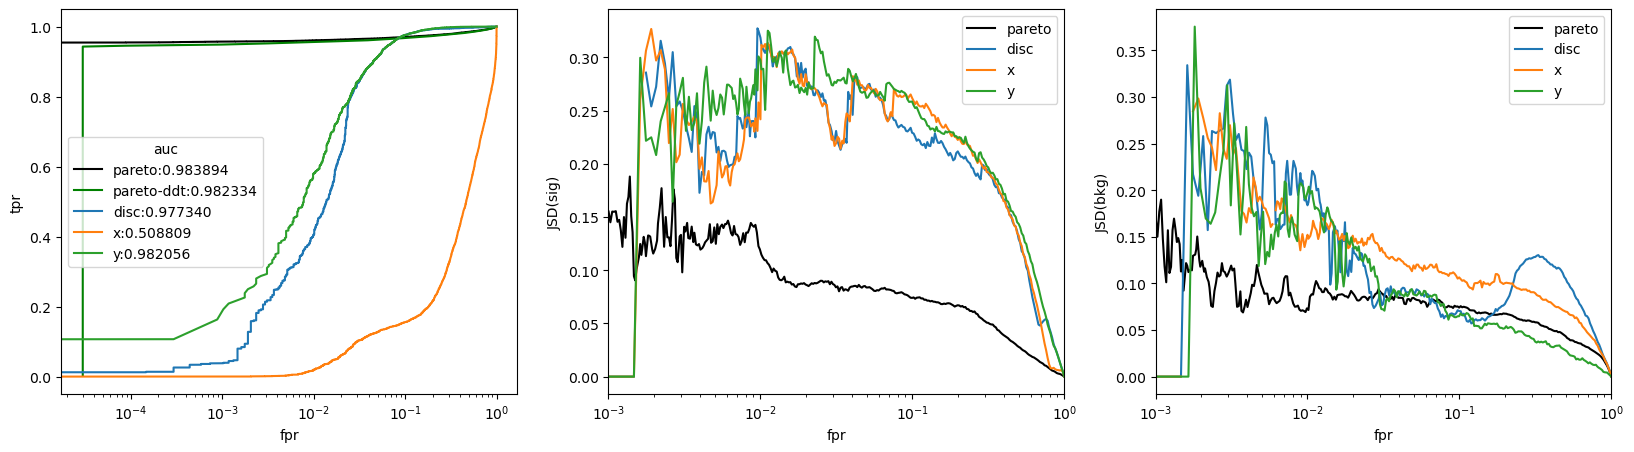

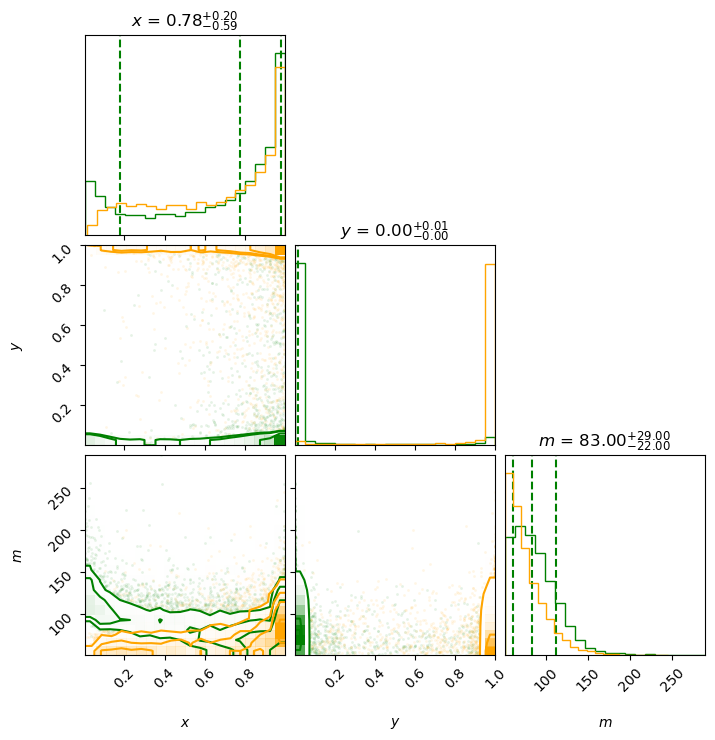

In [4]:
torch.cuda.empty_cache()
test_codec_model               = codec_model(3,dataset1,dataset2,iCorr=0.1,cor_nspace=[0],iCorr1=1.0,acor_nspace=[],iCorr2=0,n_epochs=75,n_epochs_mse=15,batch_size=1000)
scores_out,labels_out,mass_out,space_out = test_codec_model.run_all() 
plotAll(scores_out,labels_out,mass_out,space_out,theta,mass,label,0.5,0.5)

Epoch: 0 LOSS train: 1.0210 valid: 0.9999 clr: 0.0000 var: 0.9899 cor: 0.0187 corr1: 0.0124 corr2: 0.0000
Epoch: 1 LOSS train: 0.9943 valid: 0.9930 clr: 0.0000 var: 0.9897 cor: 0.0013 corr1: 0.0034 corr2: 0.0000
Epoch: 2 LOSS train: 0.9924 valid: 0.9921 clr: 0.0000 var: 0.9896 cor: 0.0005 corr1: 0.0023 corr2: 0.0000
Epoch: 3 LOSS train: 0.9916 valid: 0.9915 clr: 0.0000 var: 0.9896 cor: 0.0003 corr1: 0.0017 corr2: 0.0000
Epoch: 4 LOSS train: 0.9912 valid: 0.9911 clr: 0.0000 var: 0.9896 cor: 0.0003 corr1: 0.0014 corr2: 0.0000
Epoch: 5 LOSS train: 0.9910 valid: 0.9909 clr: 0.0000 var: 0.9896 cor: 0.0003 corr1: 0.0011 corr2: 0.0000
Epoch: 6 LOSS train: 0.9908 valid: 0.9906 clr: 0.0000 var: 0.9895 cor: 0.0003 corr1: 0.0010 corr2: 0.0000
Epoch: 7 LOSS train: 0.9906 valid: 0.9904 clr: 0.0000 var: 0.9895 cor: 0.0003 corr1: 0.0008 corr2: 0.0000
Epoch: 8 LOSS train: 0.9905 valid: 0.9902 clr: 0.0000 var: 0.9894 cor: 0.0003 corr1: 0.0007 corr2: 0.0000
Epoch: 9 LOSS train: 0.9903 valid: 0.9900 clr:

Epoch: 3 LOSS train: 0.06821075826883316 valid: 0.0717422142624855
Epoch: 4 LOSS train: 0.06798145920038223 valid: 0.07151904702186584
Epoch: 5 LOSS train: 0.06780585646629333 valid: 0.07134173065423965
Epoch: 6 LOSS train: 0.0676489770412445 valid: 0.07116763293743134
Epoch: 7 LOSS train: 0.06749361008405685 valid: 0.07098773121833801
Epoch: 8 LOSS train: 0.06733997166156769 valid: 0.07081884145736694
Epoch: 9 LOSS train: 0.0671907588839531 valid: 0.0706651359796524
Epoch: 10 LOSS train: 0.06704677641391754 valid: 0.07053857296705246
Epoch: 11 LOSS train: 0.06690508127212524 valid: 0.0703912302851677
Epoch: 12 LOSS train: 0.06676604598760605 valid: 0.07026838511228561
Epoch: 13 LOSS train: 0.06662759929895401 valid: 0.07013743370771408
Epoch: 14 LOSS train: 0.06649068742990494 valid: 0.07003149390220642
AUC 0.9580686357038352
test -0.2603723341734511 0.2335684531898416
test -0.5382198715229948 0.45089098470656364
test 0.2536813674283311 0.15156896299527847


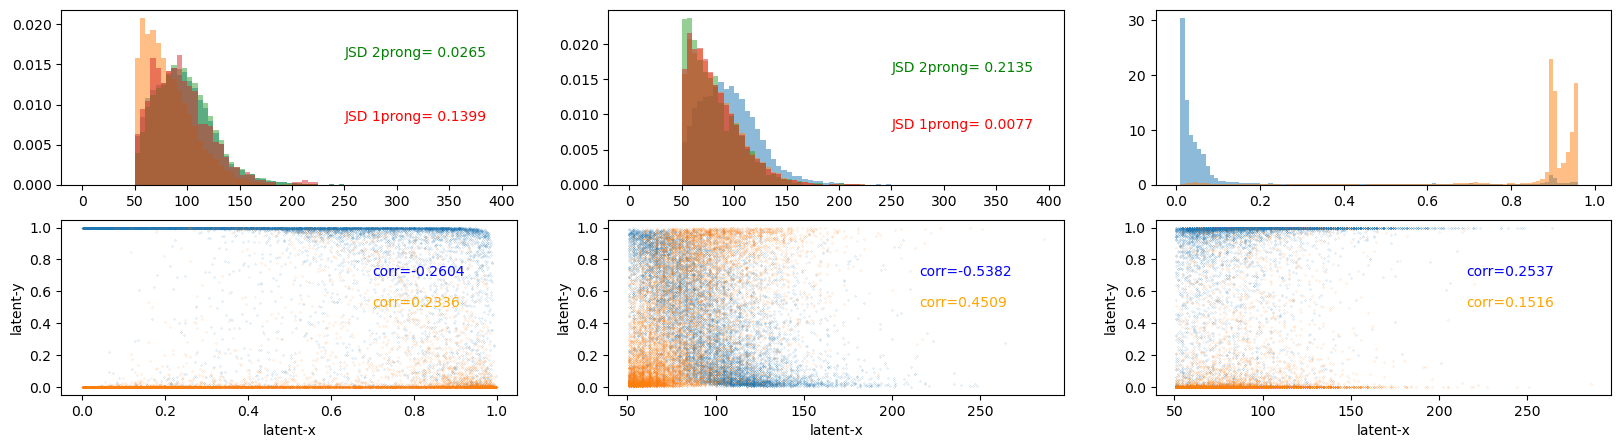

/storage/local/data1/home/pharris/mambaforge/envs/torchsort/lib/python3.10/site-packages/numpy/lib/histograms.py:906: RuntimeWarning: invalid value encountered in divide
  return n/db/n.sum(), bin_edges


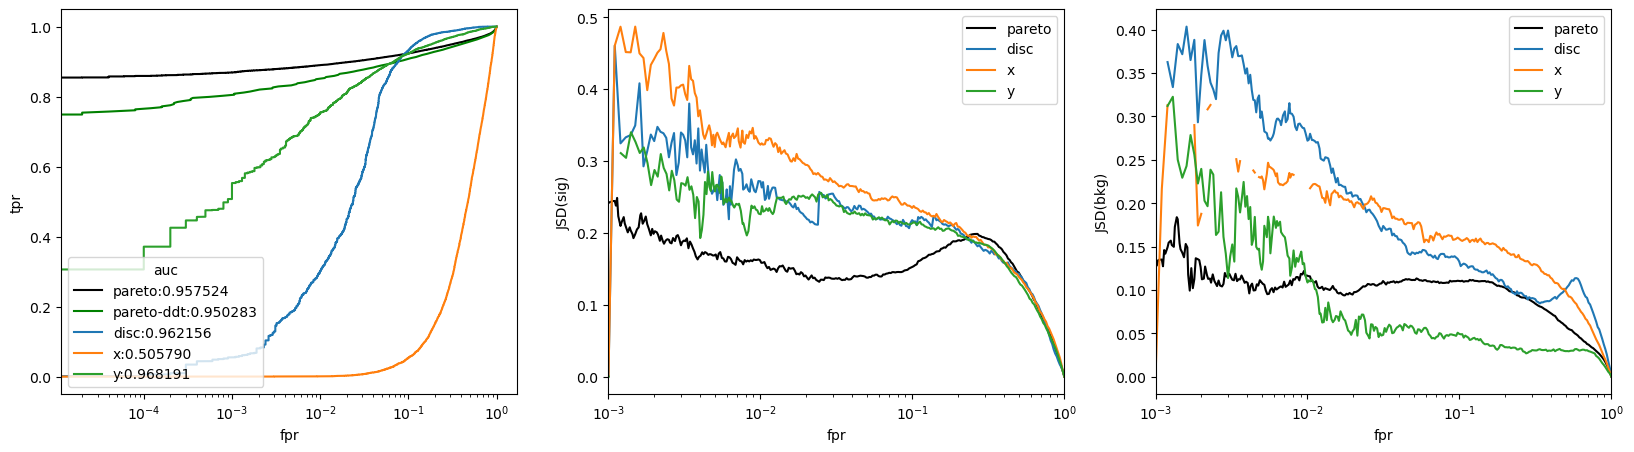

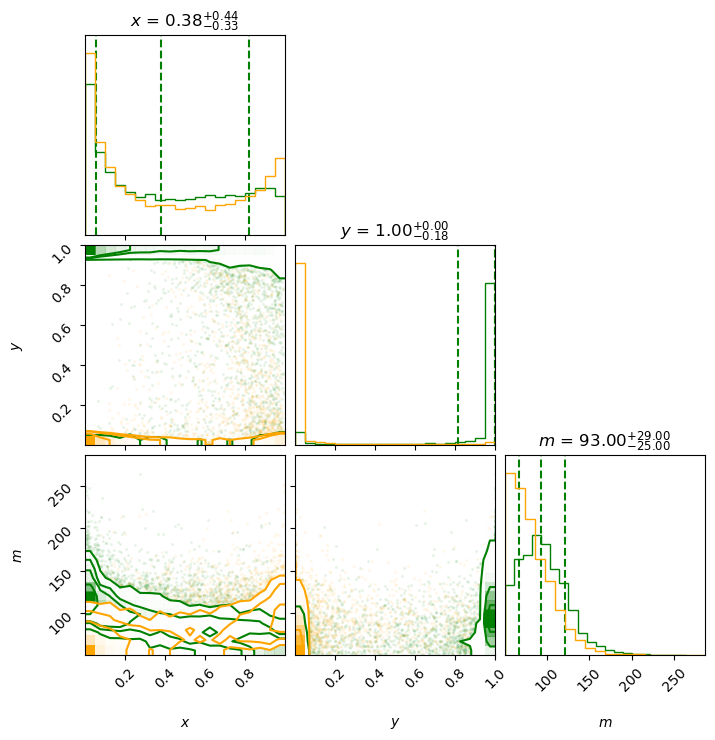

In [3]:
torch.cuda.empty_cache()
test_codec_model               = codec_model(3,dataset1,dataset2,iCorr=0.1,cor_nspace=[0],iCorr1=10.0,acor_nspace=[],iCorr2=0,n_epochs=75,n_epochs_mse=15,batch_size=1000)
scores_out,labels_out,mass_out,space_out = test_codec_model.run_all() 
plotAll(scores_out,labels_out,mass_out,space_out,theta,mass,label,0.5,0.5)

Epoch: 0 LOSS train: 1.0912 valid: 1.0044 clr: 0.0000 var: 0.9898 cor: 0.1000 corr1: 0.0015 corr2: 0.0000
Epoch: 1 LOSS train: 0.9930 valid: 0.9902 clr: 0.0000 var: 0.9895 cor: 0.0031 corr1: 0.0004 corr2: 0.0000
Epoch: 2 LOSS train: 0.9921 valid: 0.9926 clr: 0.0000 var: 0.9893 cor: 0.0023 corr1: 0.0004 corr2: 0.0000
Epoch: 3 LOSS train: 0.9927 valid: 0.9929 clr: 0.0000 var: 0.9893 cor: 0.0031 corr1: 0.0004 corr2: 0.0000
Epoch: 4 LOSS train: 0.9929 valid: 0.9928 clr: 0.0000 var: 0.9892 cor: 0.0033 corr1: 0.0004 corr2: 0.0000
Epoch: 5 LOSS train: 0.9930 valid: 0.9924 clr: 0.0000 var: 0.9891 cor: 0.0035 corr1: 0.0004 corr2: 0.0000
Epoch: 6 LOSS train: 0.9930 valid: 0.9920 clr: 0.0000 var: 0.9891 cor: 0.0035 corr1: 0.0004 corr2: 0.0000
Epoch: 7 LOSS train: 0.9928 valid: 0.9914 clr: 0.0000 var: 0.9890 cor: 0.0034 corr1: 0.0004 corr2: 0.0000
Epoch: 8 LOSS train: 0.9924 valid: 0.9909 clr: 0.0000 var: 0.9889 cor: 0.0031 corr1: 0.0004 corr2: 0.0000
Epoch: 9 LOSS train: 0.9922 valid: 0.9909 clr:

Epoch: 3 LOSS train: 0.07905275374650955 valid: 0.07849385589361191
Epoch: 4 LOSS train: 0.07903221249580383 valid: 0.0784667506814003
Epoch: 5 LOSS train: 0.0790083110332489 valid: 0.07843288034200668
Epoch: 6 LOSS train: 0.07896392792463303 valid: 0.07837548106908798
Epoch: 7 LOSS train: 0.07889147102832794 valid: 0.07831213623285294
Epoch: 8 LOSS train: 0.07881029695272446 valid: 0.07824737578630447
Epoch: 9 LOSS train: 0.07871659100055695 valid: 0.07816839963197708
Epoch: 10 LOSS train: 0.07859917730093002 valid: 0.07808836549520493
Epoch: 11 LOSS train: 0.07846442610025406 valid: 0.07801143825054169
Epoch: 12 LOSS train: 0.07832846790552139 valid: 0.07794156670570374
Epoch: 13 LOSS train: 0.0782032385468483 valid: 0.07787854969501495
Epoch: 14 LOSS train: 0.07808729261159897 valid: 0.07781853526830673
AUC 0.9425734757686294
test -0.010004143870852071 0.026630109466742505
test -0.17538679061567658 0.046948306929994965
test -0.17497002676547707 -0.10206463962122107


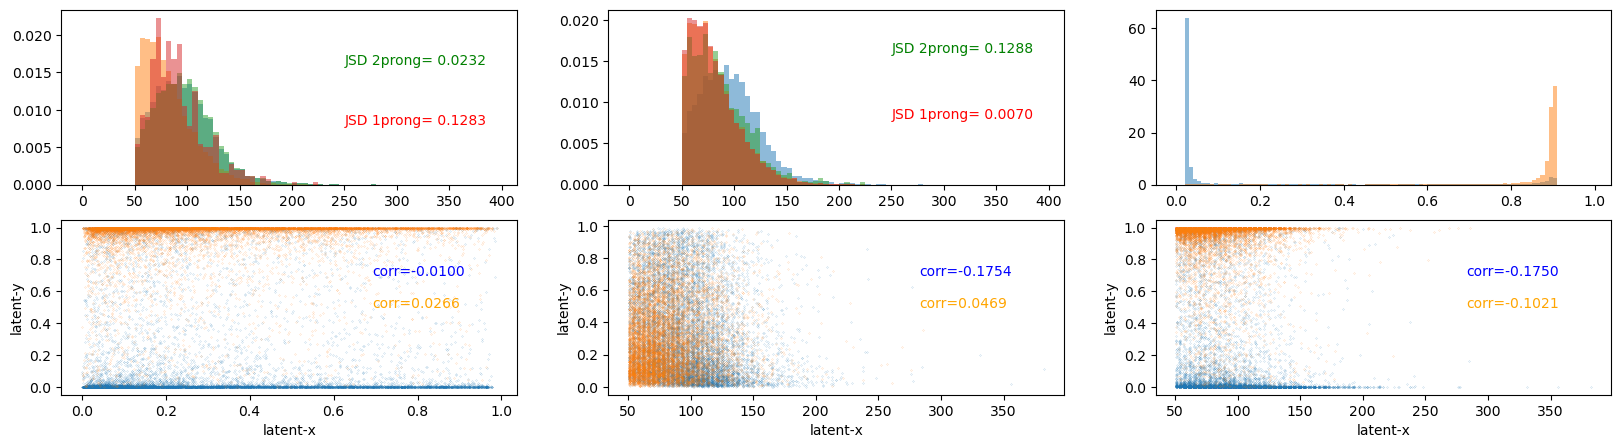

/storage/local/data1/home/pharris/mambaforge/envs/torchsort/lib/python3.10/site-packages/numpy/lib/histograms.py:906: RuntimeWarning: invalid value encountered in divide
  return n/db/n.sum(), bin_edges


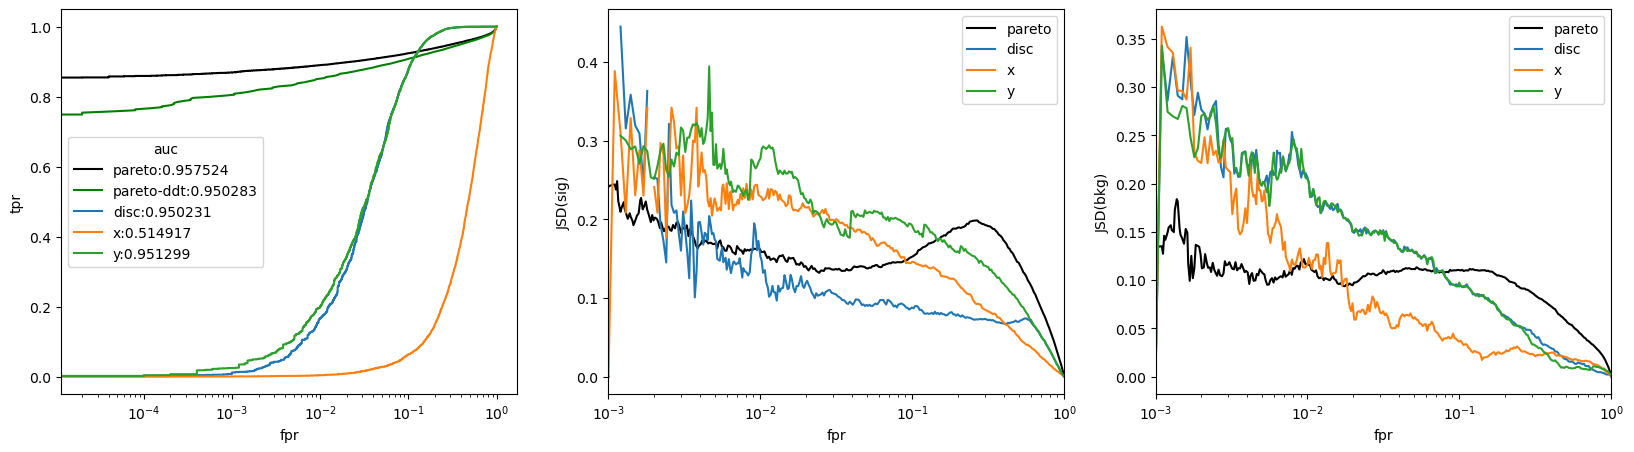

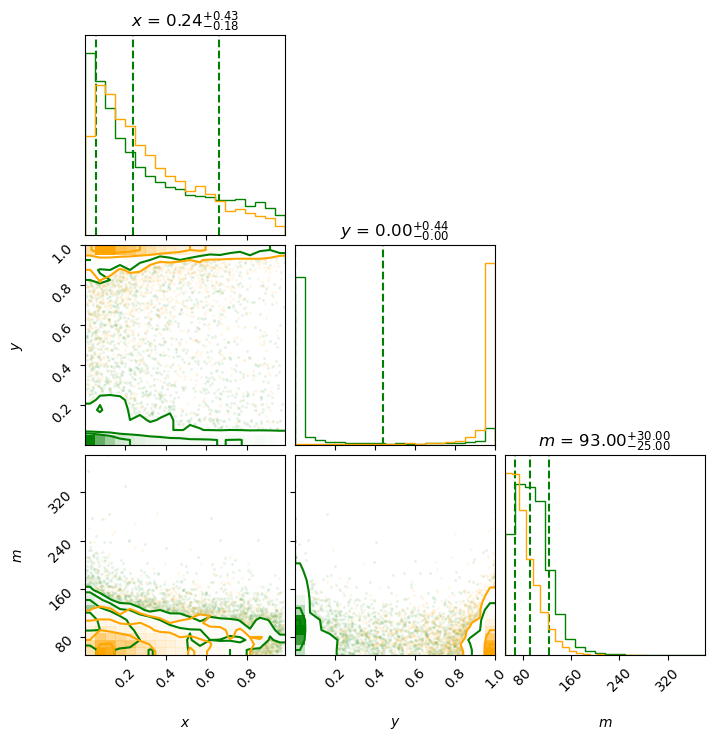

In [4]:
torch.cuda.empty_cache()
test_codec_model               = codec_model(3,dataset1,dataset2,iCorr=1.0,cor_nspace=[0],iCorr1=1.0,acor_nspace=[],iCorr2=0,n_epochs=75,n_epochs_mse=15,batch_size=1000)
scores_out,labels_out,mass_out,space_out = test_codec_model.run_all() 
plotAll(scores_out,labels_out,mass_out,space_out,theta,mass,label,0.5,0.5)